# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from torch.autograd import Variable
import torch
import torchvision

## Carregamento dos dados do MNIST

In [32]:
! git clone https://github.com/vcasadei/MNIST.git

fatal: destination path 'MNIST' already exists and is not an empty directory.


In [33]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


<ipython-input-33-6143b94785d1>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [34]:
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(-0.5, 232.5, 87.5, -0.5)

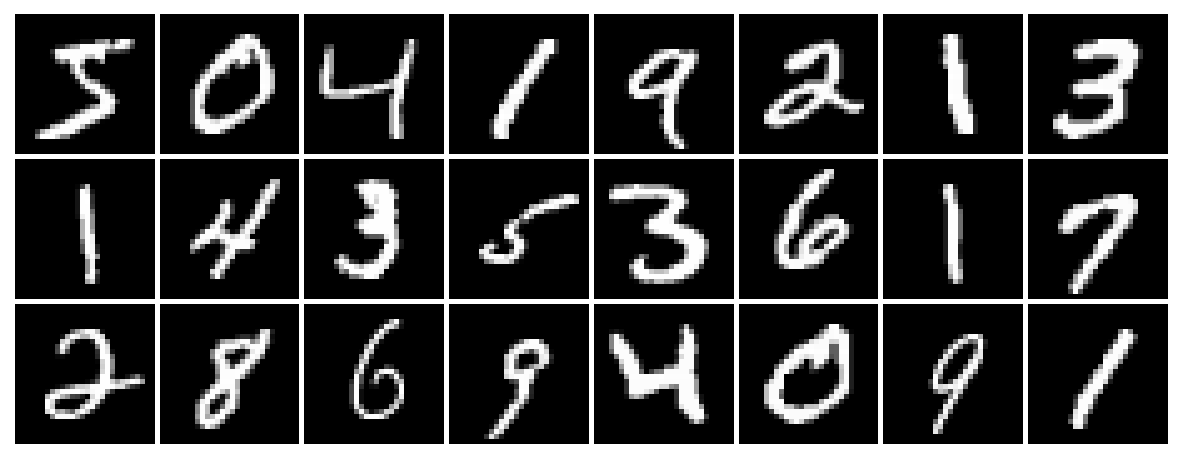

In [35]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


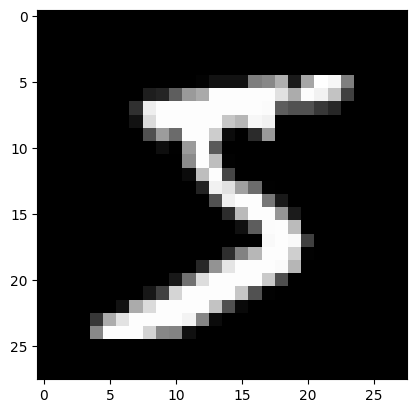

In [36]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy().reshape(28,28), cmap='gray')
print('class:', target)

## Modelo

In [37]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na saída

### Testando um predict com poucas amostras

In [38]:
## TODO


## Treinamento

### Inicialização dos parâmetros

In [39]:
epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [40]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-wvcpeko4
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-wvcpeko4
  Resolved https://github.com/szagoruyko/pytorchviz to commit 0adcd83af8aa7ab36d6afd139cabbd9df598edb7
  Preparing metadata (setup.py) ... done


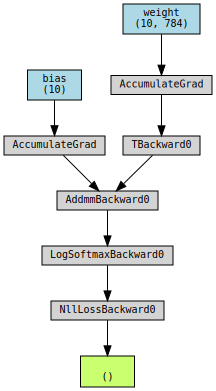

In [41]:
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
from torchviz import make_dot, make_dot_from_trace
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

In [42]:
from IPython import display
import numpy
a = 5
losses = []
zs = []
fig = plt.figure(figsize=(18, 6))

try:
    for i in range(epochs):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # Predict da rede
        outputs = model(inputs)
        zs.append(outputs[1].detach().numpy())

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.data)
        _, predicts = torch.max(outputs, 1)

        y_pred = predicts.data
        accuracy = (y_pred.numpy() == y_train.numpy()).mean()

except KeyboardInterrupt:
    pass

<Figure size 1800x600 with 0 Axes>

In [43]:
model.weight.grad

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [44]:
print('Final loss:', loss.data)

Final loss: tensor(1.0928)


### Visualizando gráfico de perda durante o treinamento

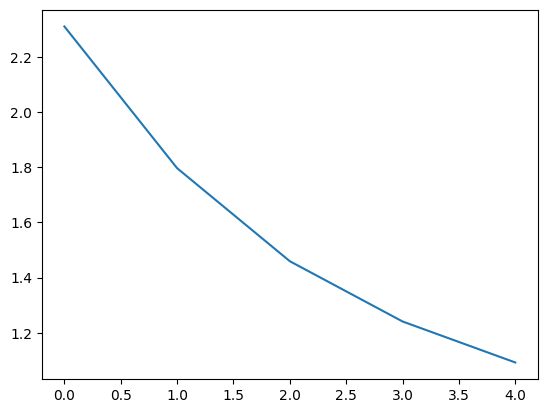

In [45]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [46]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.826


### Matriz de confusão com dados de treinamento e teste

In [47]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,93,0,2,1,0,1,1,1,0,3
1,0,109,10,1,1,4,3,6,9,1
2,2,0,74,0,1,3,2,1,2,0
3,0,1,1,81,0,17,0,0,10,2
4,0,0,2,0,87,3,1,3,0,6
5,0,1,0,1,0,55,0,0,1,2
6,2,1,2,1,4,3,87,1,1,0
7,0,0,5,4,1,1,0,102,0,9
8,0,3,2,2,0,2,0,0,61,0


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


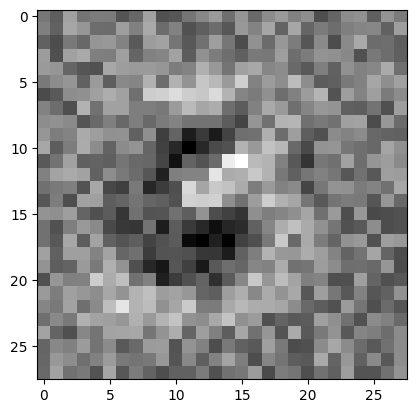

In [48]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

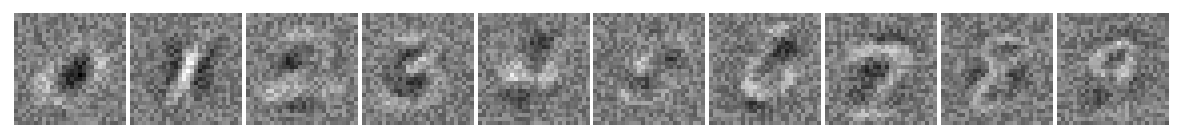

In [49]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

Época 1/100, Perda: 0.125573, Acurácia: 0.9800


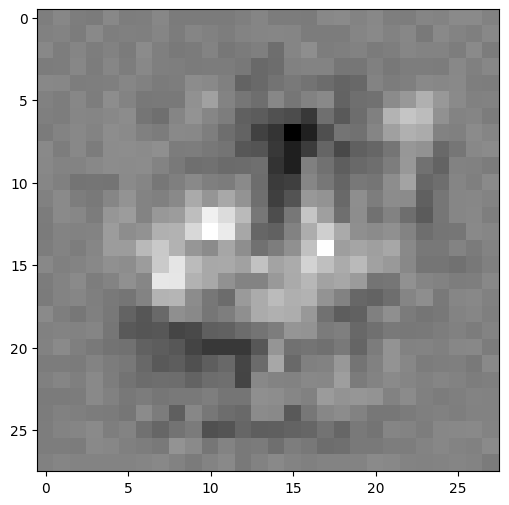

Época 2/100, Perda: 0.125271, Acurácia: 0.9800


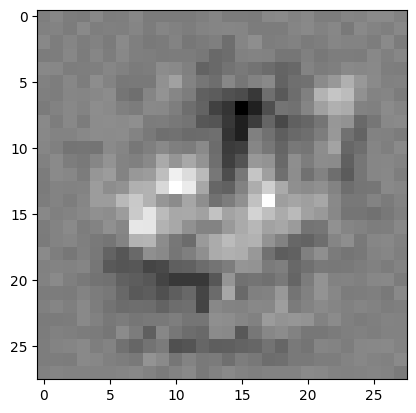

Época 3/100, Perda: 0.124971, Acurácia: 0.9800


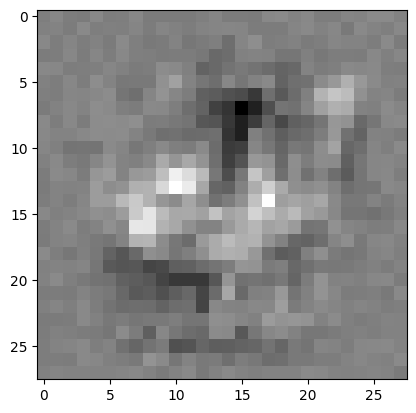

Época 4/100, Perda: 0.124673, Acurácia: 0.9800


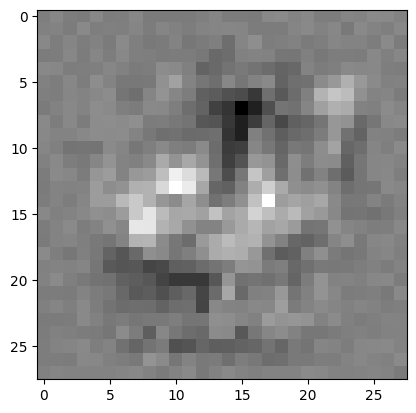

Época 5/100, Perda: 0.124375, Acurácia: 0.9810


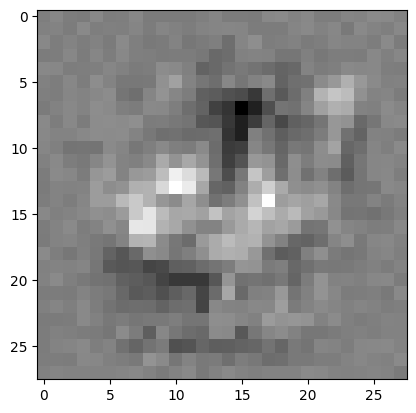

Época 6/100, Perda: 0.124079, Acurácia: 0.9810


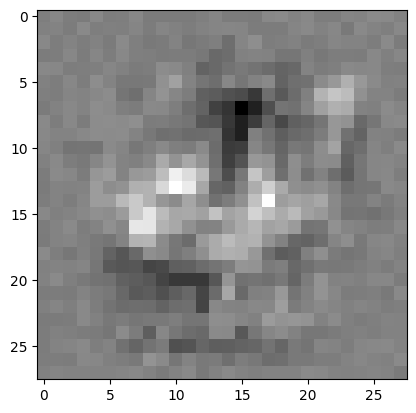

Época 7/100, Perda: 0.123784, Acurácia: 0.9810


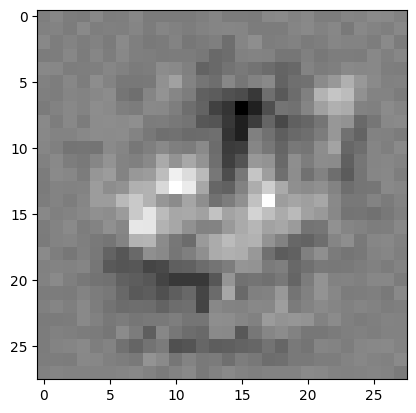

Época 8/100, Perda: 0.123490, Acurácia: 0.9810


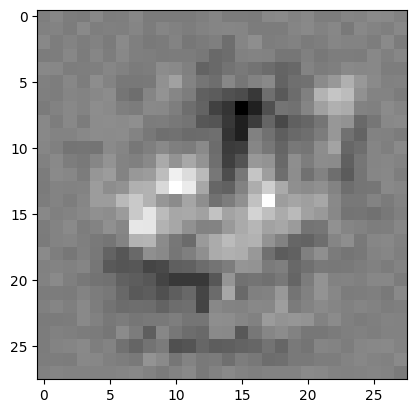

Época 9/100, Perda: 0.123198, Acurácia: 0.9810


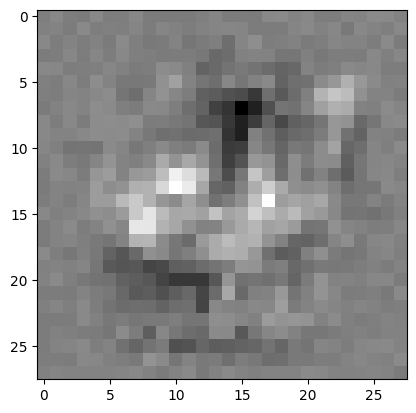

Época 10/100, Perda: 0.122906, Acurácia: 0.9810


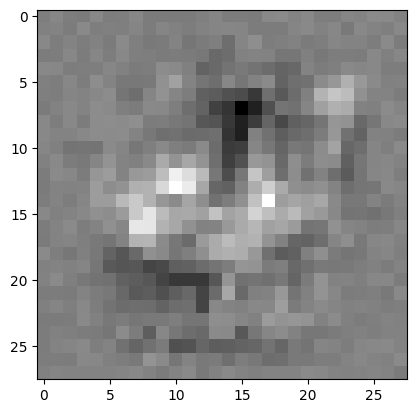

Época 11/100, Perda: 0.122616, Acurácia: 0.9820


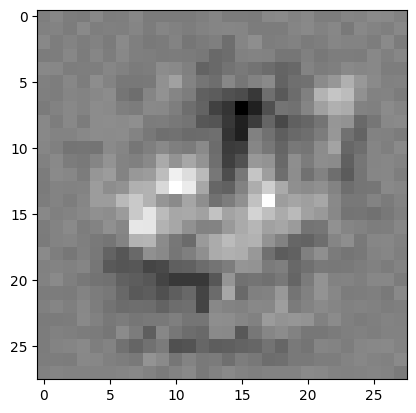

Época 12/100, Perda: 0.122328, Acurácia: 0.9820


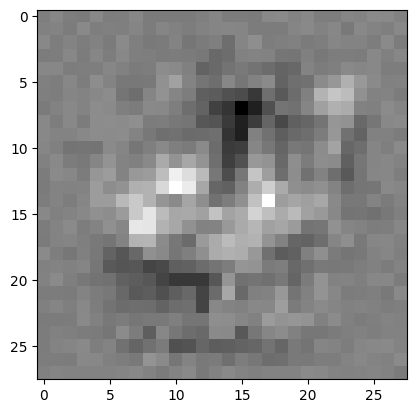

Época 13/100, Perda: 0.122040, Acurácia: 0.9830


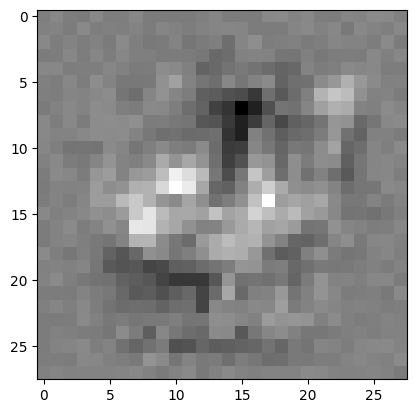

Época 14/100, Perda: 0.121754, Acurácia: 0.9830


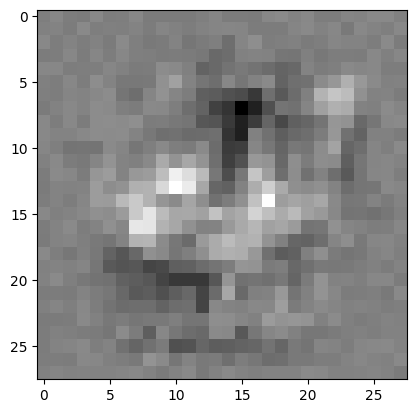

Época 15/100, Perda: 0.121469, Acurácia: 0.9830


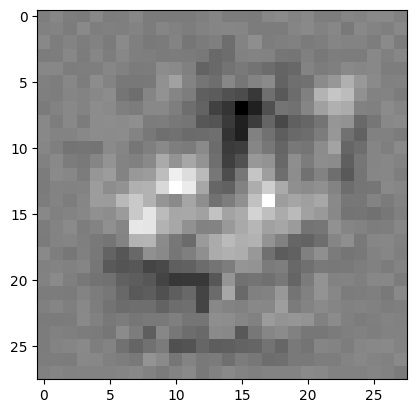

Época 16/100, Perda: 0.121185, Acurácia: 0.9830


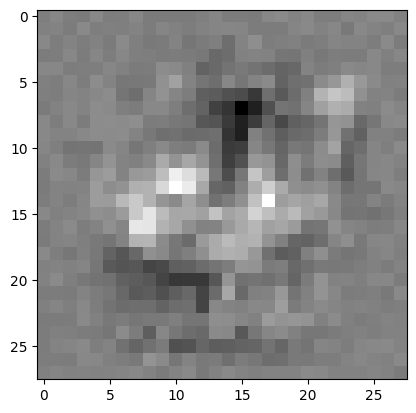

Época 17/100, Perda: 0.120902, Acurácia: 0.9830


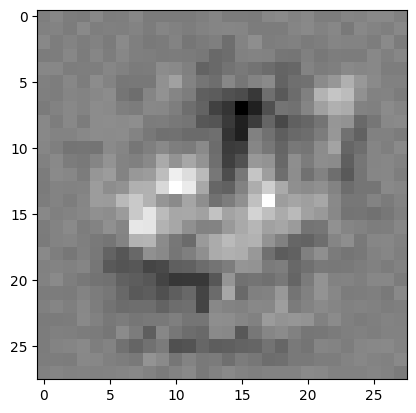

Época 18/100, Perda: 0.120621, Acurácia: 0.9830


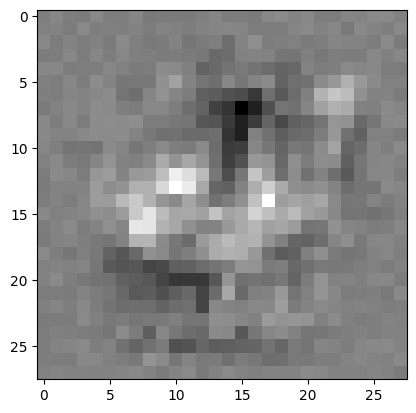

Época 19/100, Perda: 0.120340, Acurácia: 0.9830


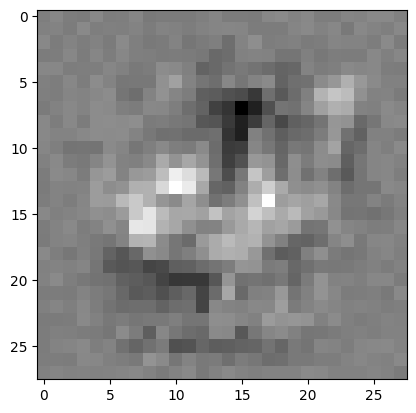

Época 20/100, Perda: 0.120061, Acurácia: 0.9840


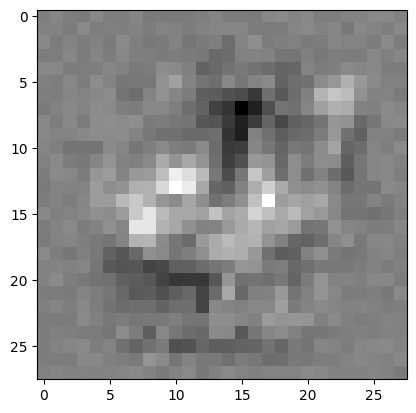

Época 21/100, Perda: 0.119783, Acurácia: 0.9840


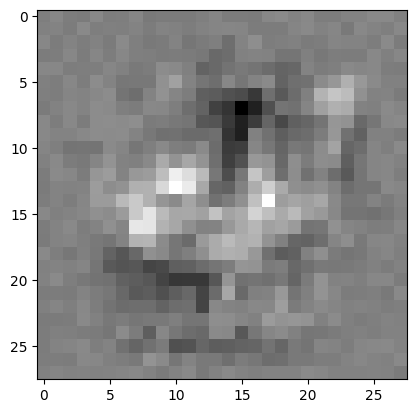

Época 22/100, Perda: 0.119506, Acurácia: 0.9850


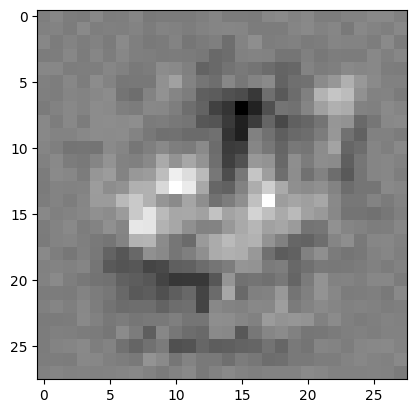

Época 23/100, Perda: 0.119230, Acurácia: 0.9850


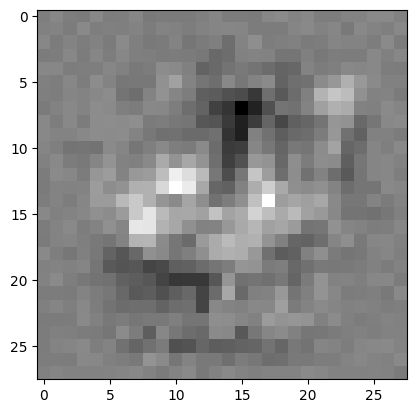

Época 24/100, Perda: 0.118956, Acurácia: 0.9850


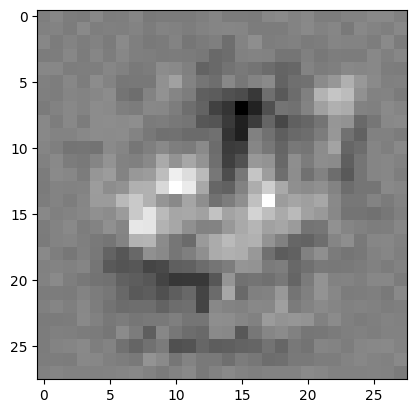

Época 25/100, Perda: 0.118682, Acurácia: 0.9860


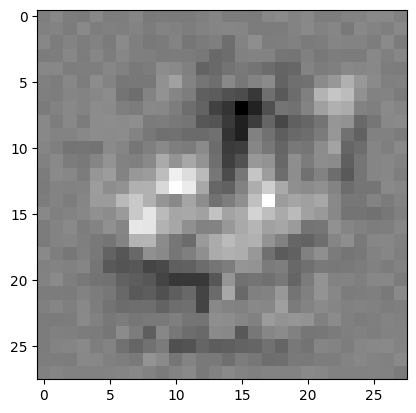

Época 26/100, Perda: 0.118410, Acurácia: 0.9860


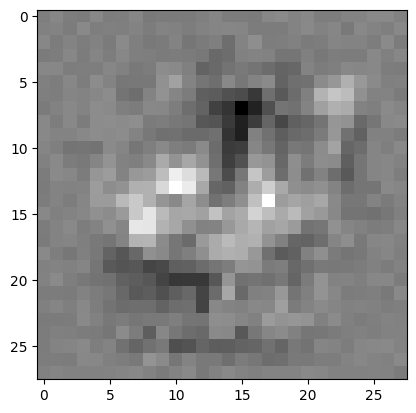

Época 27/100, Perda: 0.118139, Acurácia: 0.9870


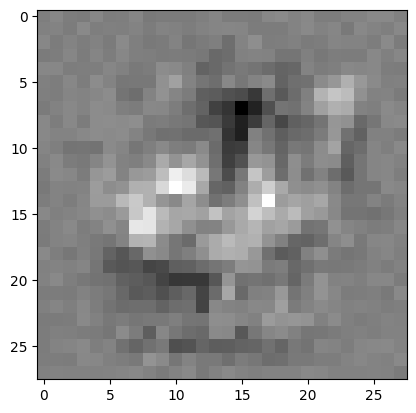

Época 28/100, Perda: 0.117869, Acurácia: 0.9870


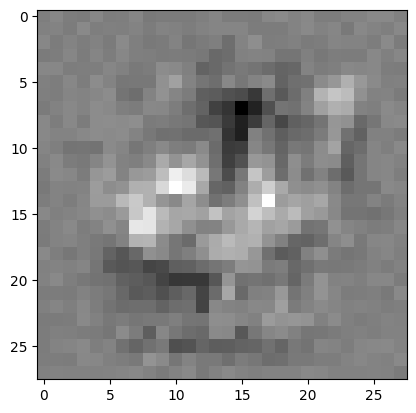

Época 29/100, Perda: 0.117600, Acurácia: 0.9870


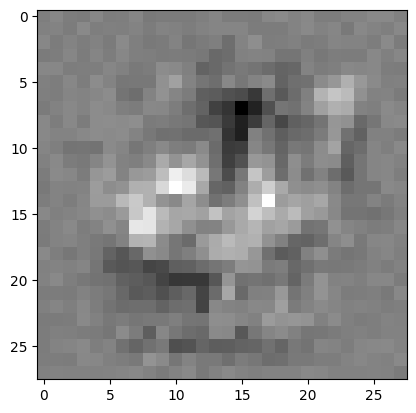

Época 30/100, Perda: 0.117332, Acurácia: 0.9880


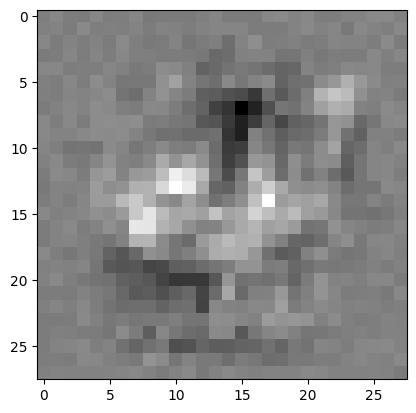

Época 31/100, Perda: 0.117065, Acurácia: 0.9880


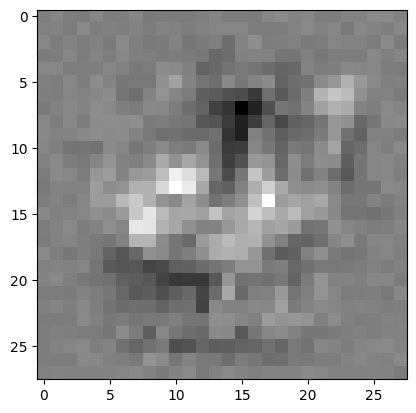

Época 32/100, Perda: 0.116799, Acurácia: 0.9880


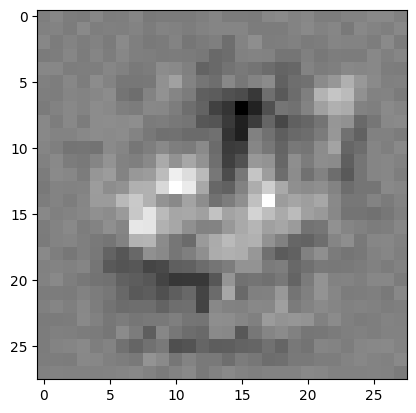

Época 33/100, Perda: 0.116535, Acurácia: 0.9880


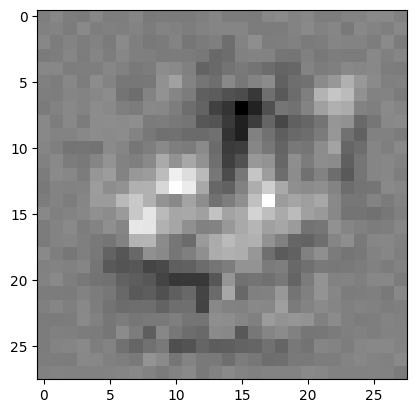

Época 34/100, Perda: 0.116271, Acurácia: 0.9880


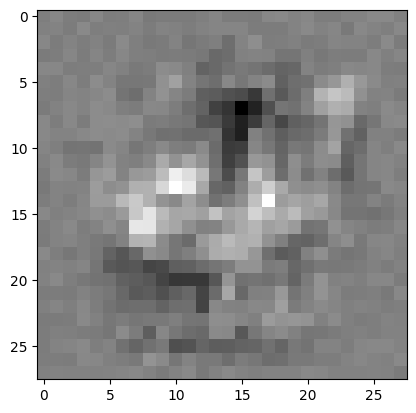

Época 35/100, Perda: 0.116009, Acurácia: 0.9890


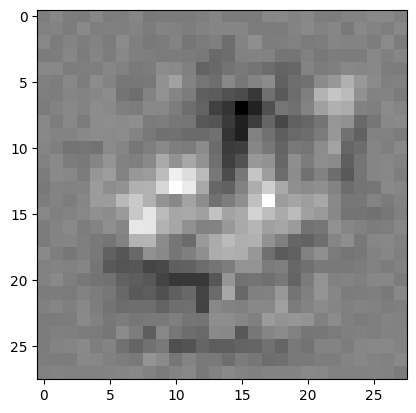

Época 36/100, Perda: 0.115747, Acurácia: 0.9890


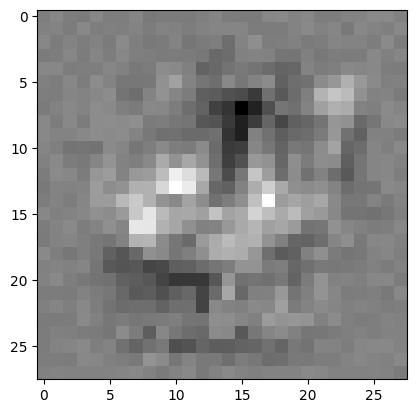

Época 37/100, Perda: 0.115487, Acurácia: 0.9890


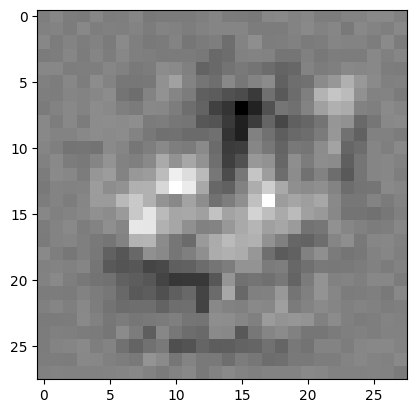

Época 38/100, Perda: 0.115228, Acurácia: 0.9890


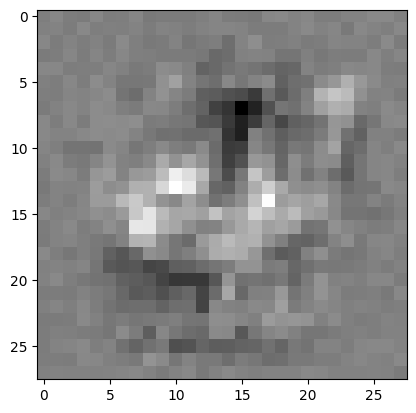

Época 39/100, Perda: 0.114970, Acurácia: 0.9890


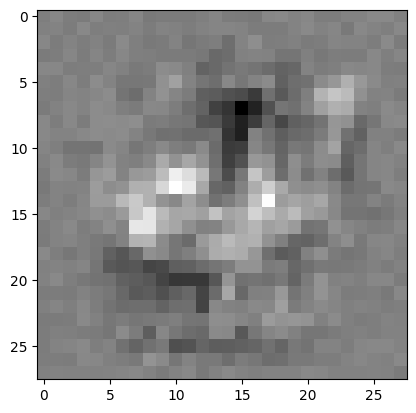

Época 40/100, Perda: 0.114712, Acurácia: 0.9890


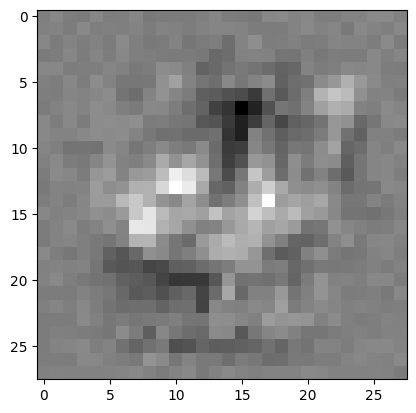

Época 41/100, Perda: 0.114456, Acurácia: 0.9890


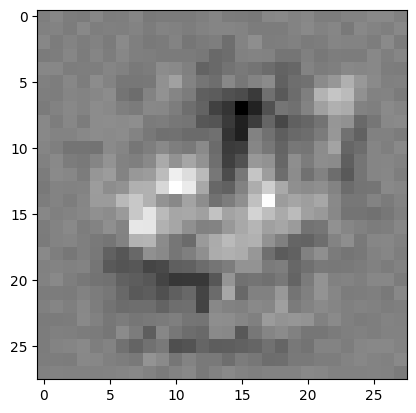

Época 42/100, Perda: 0.114201, Acurácia: 0.9890


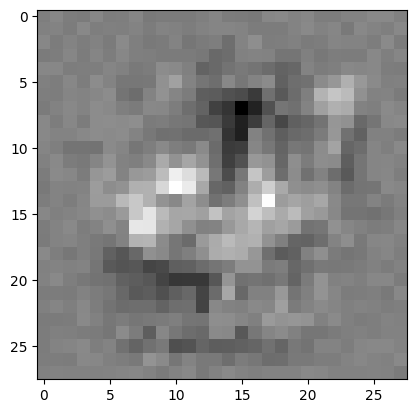

Época 43/100, Perda: 0.113947, Acurácia: 0.9890


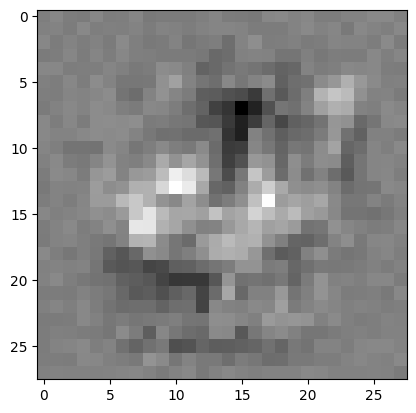

Época 44/100, Perda: 0.113694, Acurácia: 0.9890


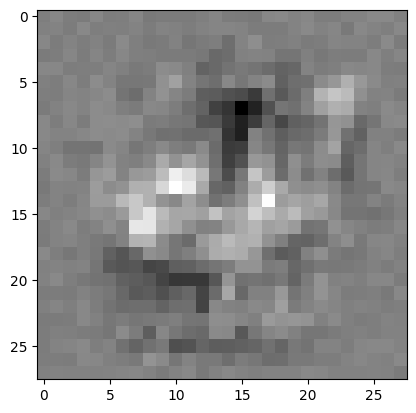

Época 45/100, Perda: 0.113442, Acurácia: 0.9890


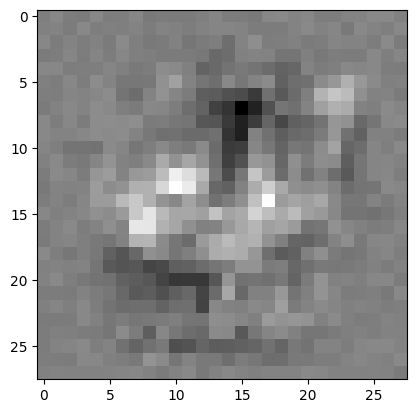

Época 46/100, Perda: 0.113191, Acurácia: 0.9890


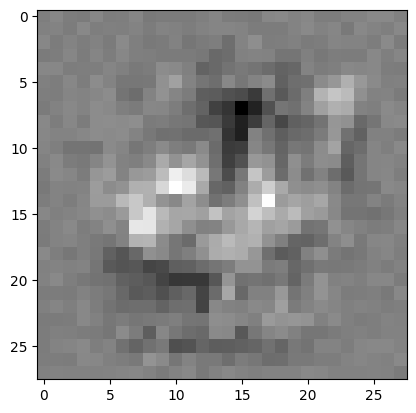

Época 47/100, Perda: 0.112941, Acurácia: 0.9890


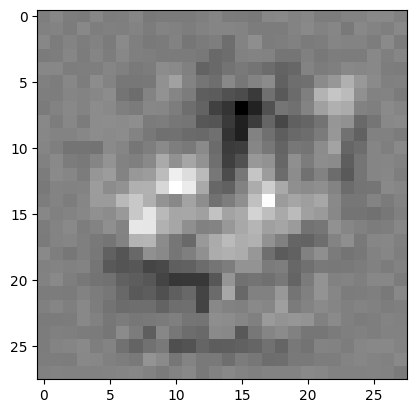

Época 48/100, Perda: 0.112692, Acurácia: 0.9890


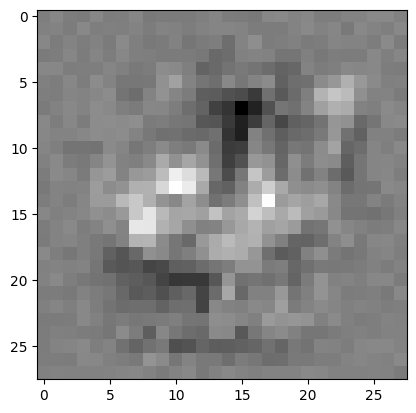

Época 49/100, Perda: 0.112444, Acurácia: 0.9890


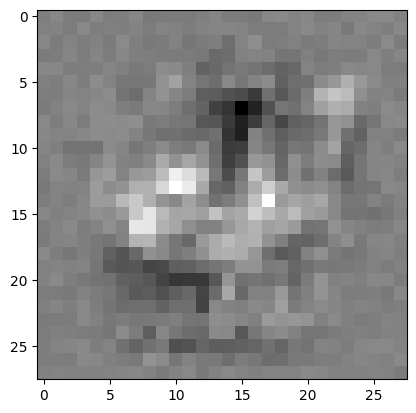

Época 50/100, Perda: 0.112196, Acurácia: 0.9890


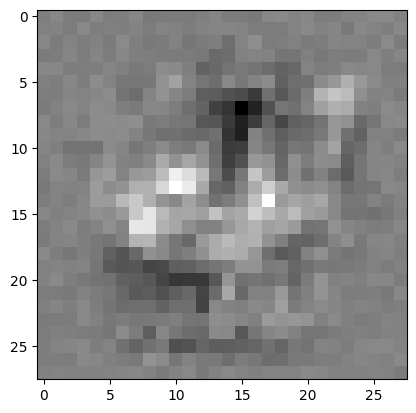

Época 51/100, Perda: 0.111950, Acurácia: 0.9890


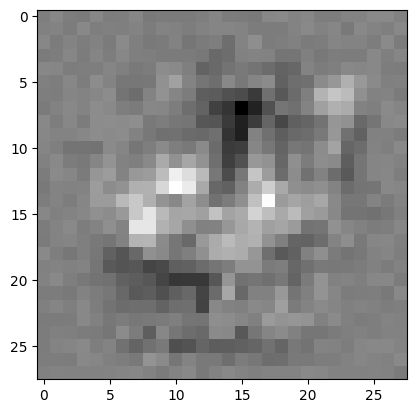

Época 52/100, Perda: 0.111705, Acurácia: 0.9890


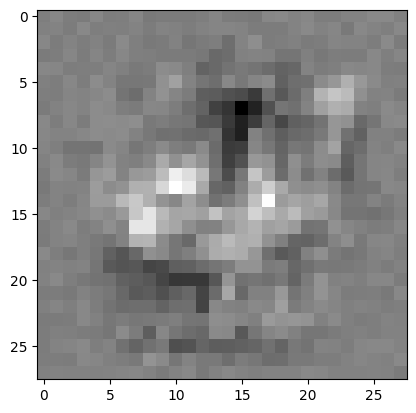

Época 53/100, Perda: 0.111461, Acurácia: 0.9890


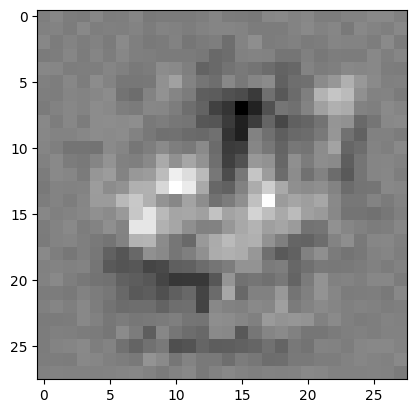

Época 54/100, Perda: 0.111218, Acurácia: 0.9890


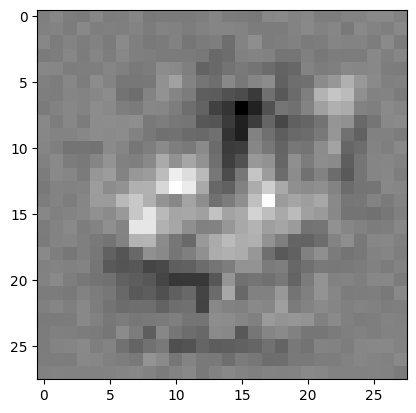

Época 55/100, Perda: 0.110975, Acurácia: 0.9890


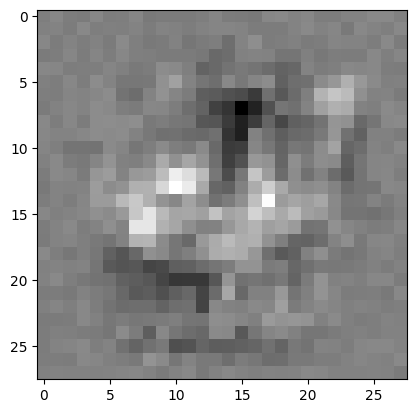

Época 56/100, Perda: 0.110734, Acurácia: 0.9890


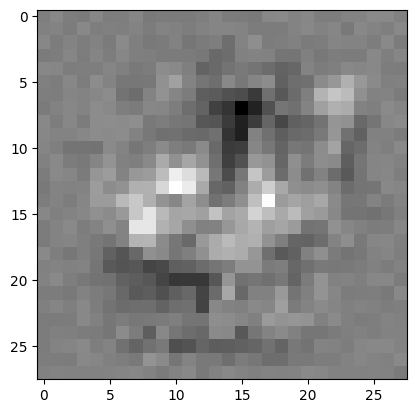

Época 57/100, Perda: 0.110494, Acurácia: 0.9890


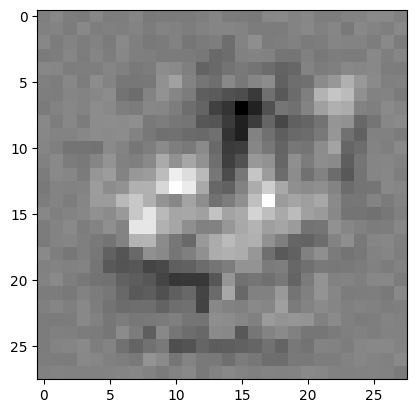

Época 58/100, Perda: 0.110254, Acurácia: 0.9890


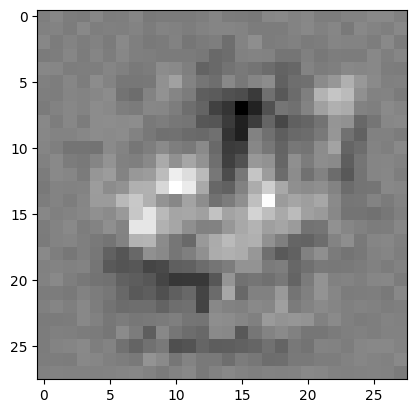

Época 59/100, Perda: 0.110016, Acurácia: 0.9890


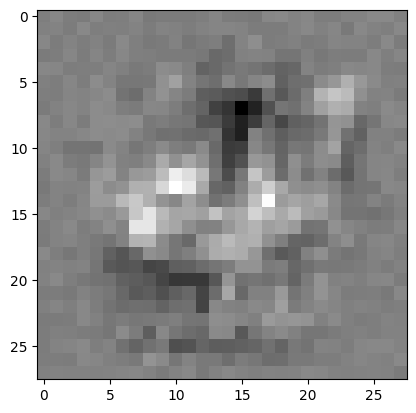

Época 60/100, Perda: 0.109778, Acurácia: 0.9890


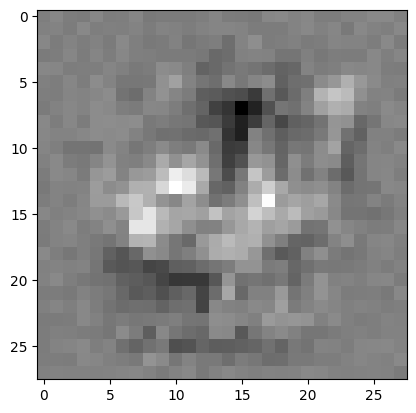

Época 61/100, Perda: 0.109541, Acurácia: 0.9890


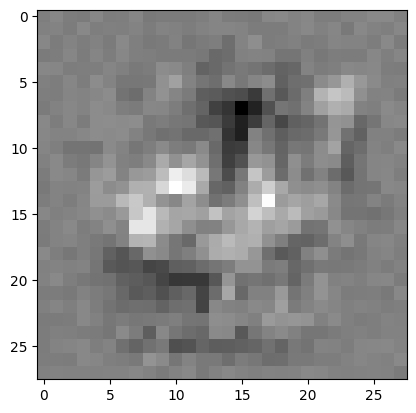

Época 62/100, Perda: 0.109306, Acurácia: 0.9890


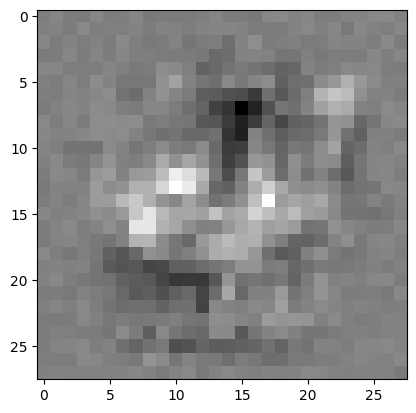

Época 63/100, Perda: 0.109071, Acurácia: 0.9890


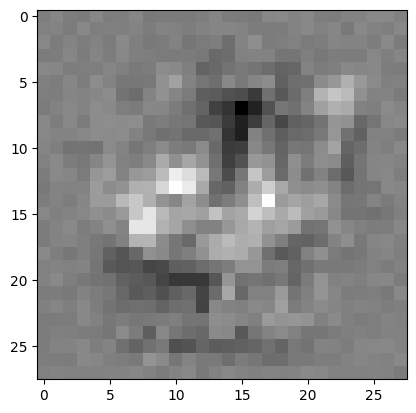

Época 64/100, Perda: 0.108837, Acurácia: 0.9890


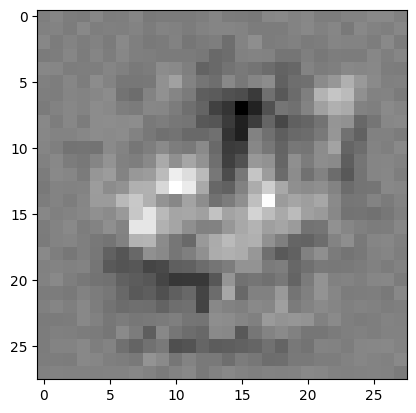

Época 65/100, Perda: 0.108604, Acurácia: 0.9890


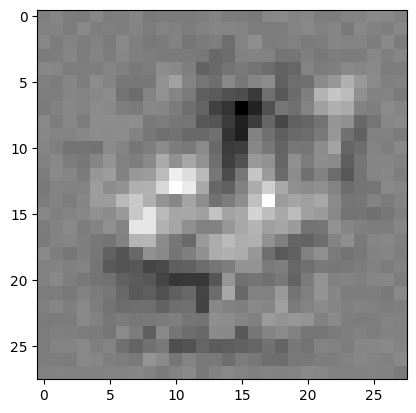

Época 66/100, Perda: 0.108372, Acurácia: 0.9890


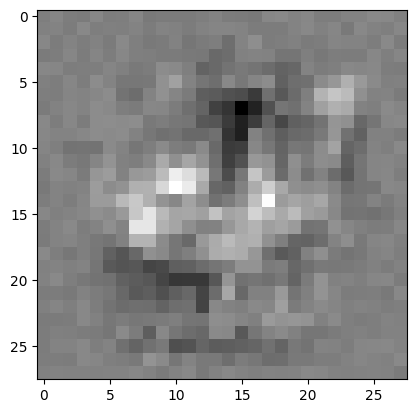

Época 67/100, Perda: 0.108140, Acurácia: 0.9900


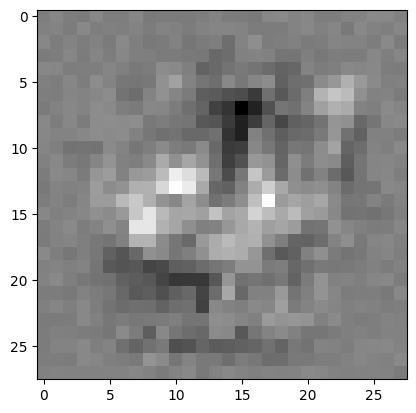

Época 68/100, Perda: 0.107910, Acurácia: 0.9900


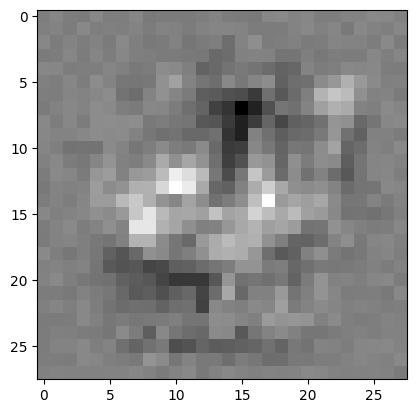

Época 69/100, Perda: 0.107681, Acurácia: 0.9900


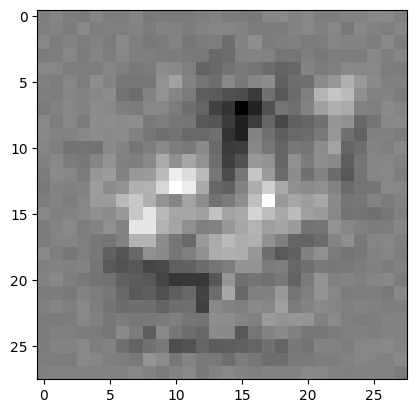

Época 70/100, Perda: 0.107452, Acurácia: 0.9900


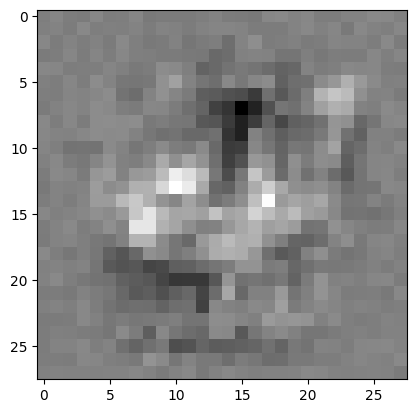

Época 71/100, Perda: 0.107224, Acurácia: 0.9900


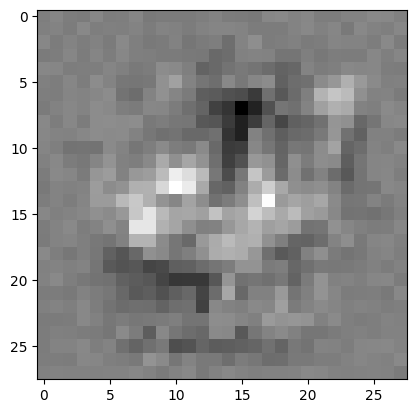

Época 72/100, Perda: 0.106998, Acurácia: 0.9900


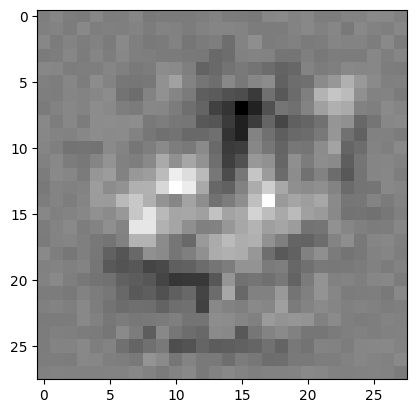

Época 73/100, Perda: 0.106772, Acurácia: 0.9900


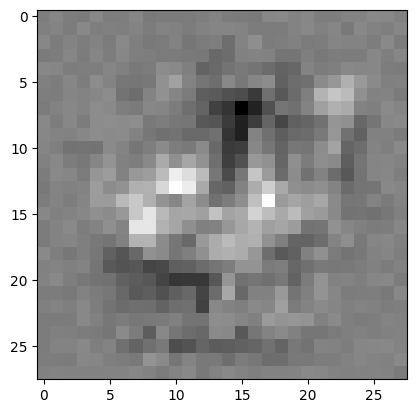

Época 74/100, Perda: 0.106546, Acurácia: 0.9900


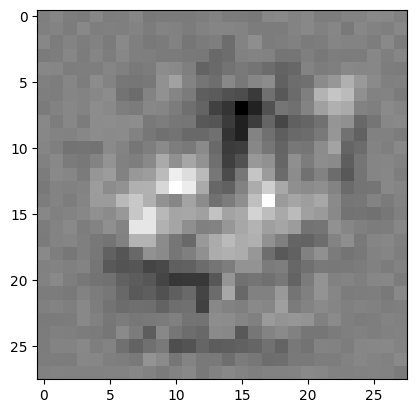

Época 75/100, Perda: 0.106322, Acurácia: 0.9900


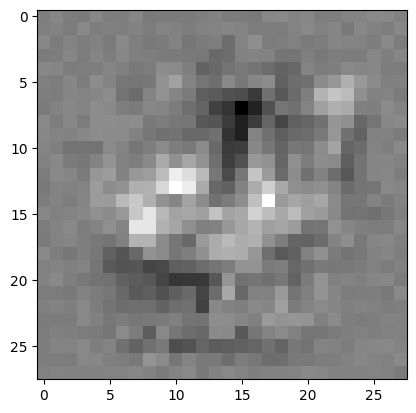

Época 76/100, Perda: 0.106099, Acurácia: 0.9900


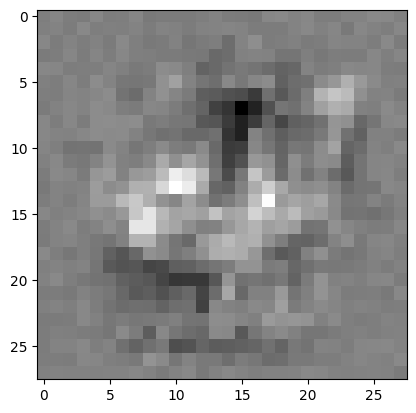

Época 77/100, Perda: 0.105876, Acurácia: 0.9900


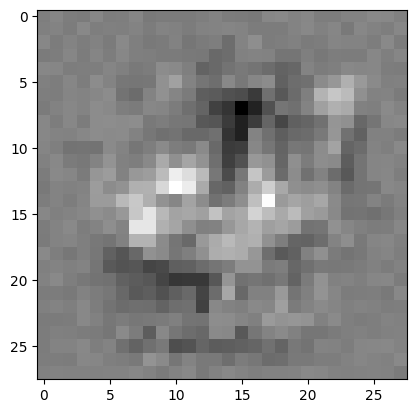

Época 78/100, Perda: 0.105655, Acurácia: 0.9900


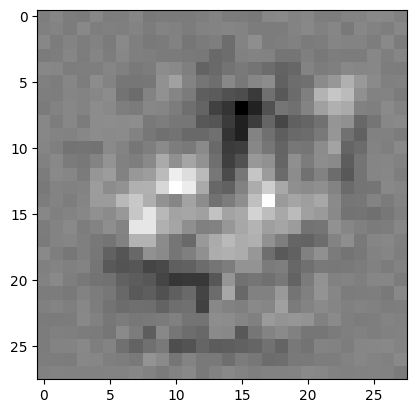

Época 79/100, Perda: 0.105434, Acurácia: 0.9900


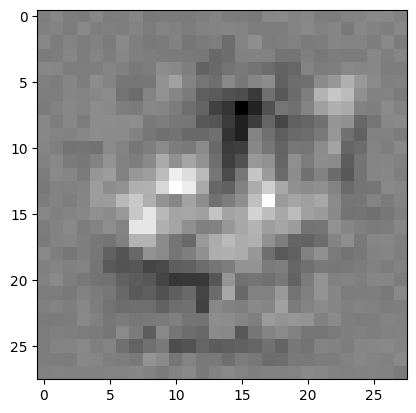

Época 80/100, Perda: 0.105214, Acurácia: 0.9920


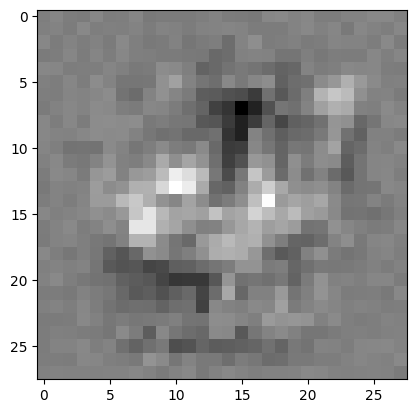

Época 81/100, Perda: 0.104994, Acurácia: 0.9920


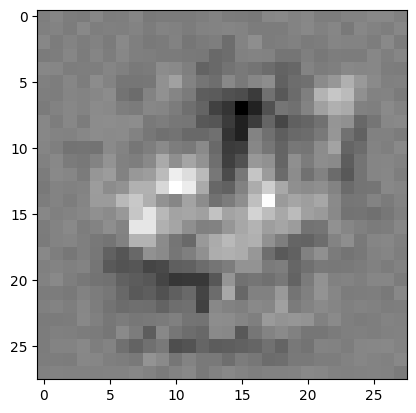

Época 82/100, Perda: 0.104776, Acurácia: 0.9920


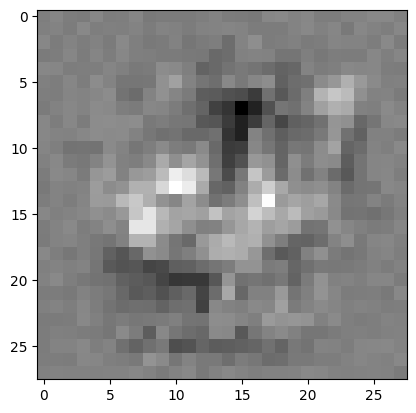

Época 83/100, Perda: 0.104558, Acurácia: 0.9920


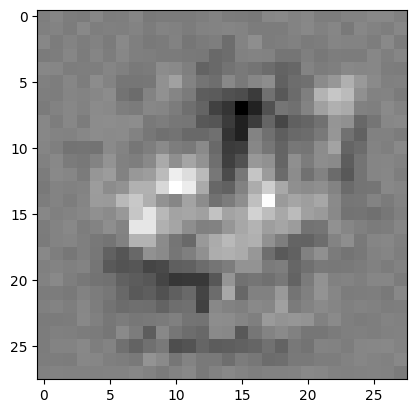

Época 84/100, Perda: 0.104342, Acurácia: 0.9920


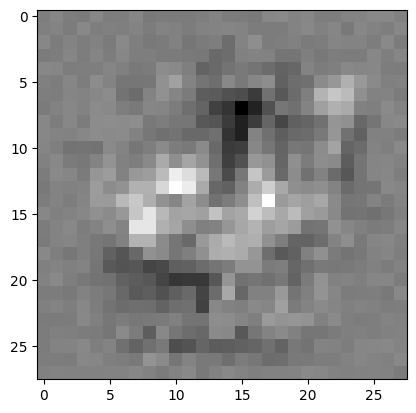

Época 85/100, Perda: 0.104126, Acurácia: 0.9920


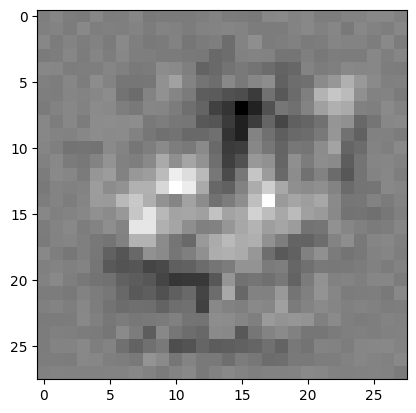

Época 86/100, Perda: 0.103911, Acurácia: 0.9920


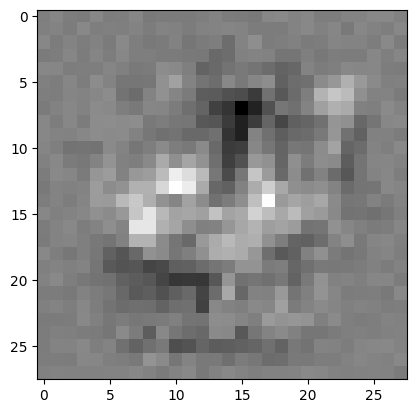

Época 87/100, Perda: 0.103696, Acurácia: 0.9920


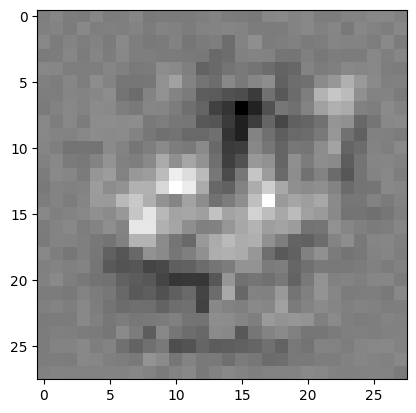

Época 88/100, Perda: 0.103483, Acurácia: 0.9920


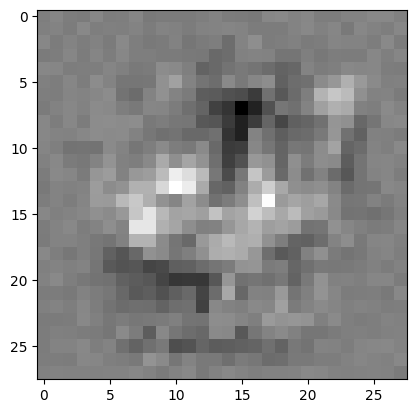

Época 89/100, Perda: 0.103270, Acurácia: 0.9920


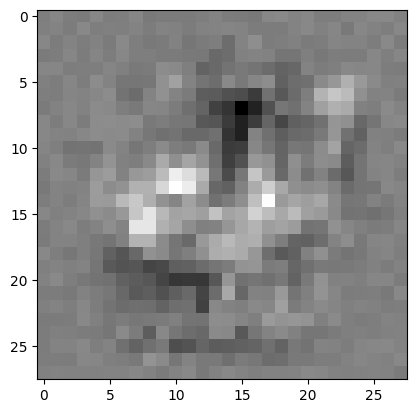

Época 90/100, Perda: 0.103058, Acurácia: 0.9920


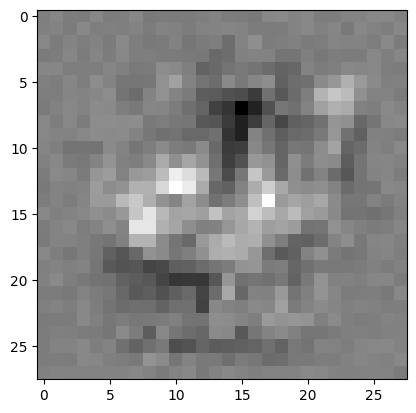

Época 91/100, Perda: 0.102847, Acurácia: 0.9920


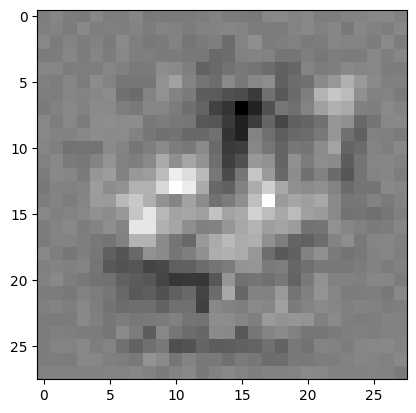

Época 92/100, Perda: 0.102636, Acurácia: 0.9930


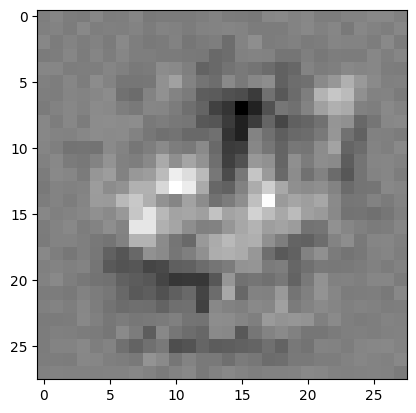

Época 93/100, Perda: 0.102427, Acurácia: 0.9930


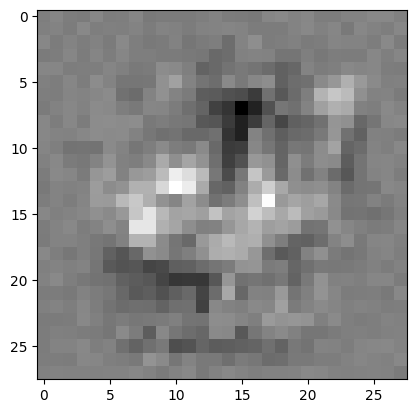

Época 94/100, Perda: 0.102218, Acurácia: 0.9930


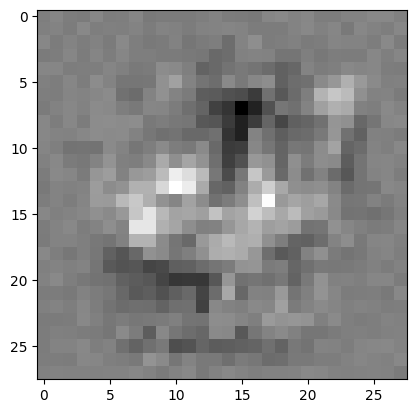

Época 95/100, Perda: 0.102010, Acurácia: 0.9930


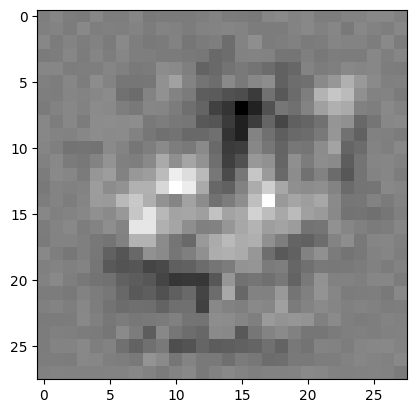

Época 96/100, Perda: 0.101803, Acurácia: 0.9930


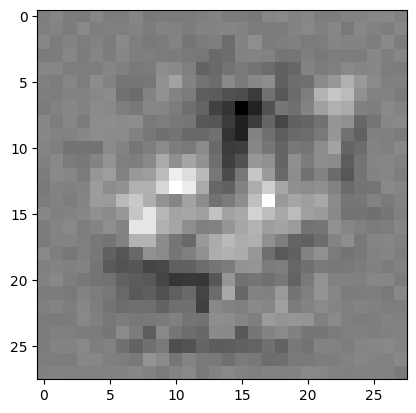

Época 97/100, Perda: 0.101596, Acurácia: 0.9930


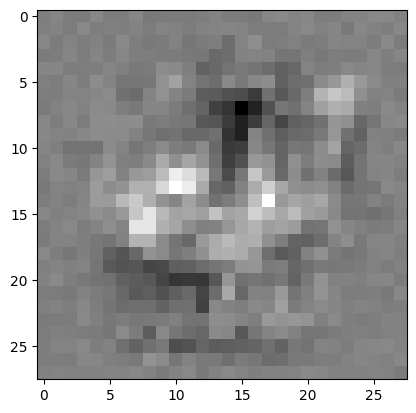

Época 98/100, Perda: 0.101390, Acurácia: 0.9930


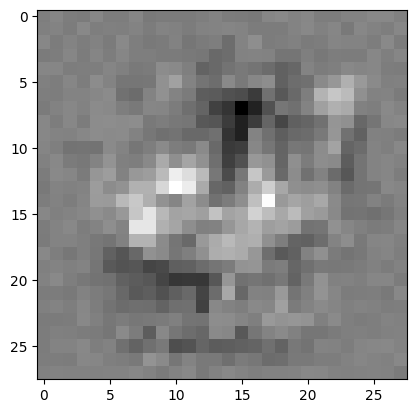

Época 99/100, Perda: 0.101185, Acurácia: 0.9930


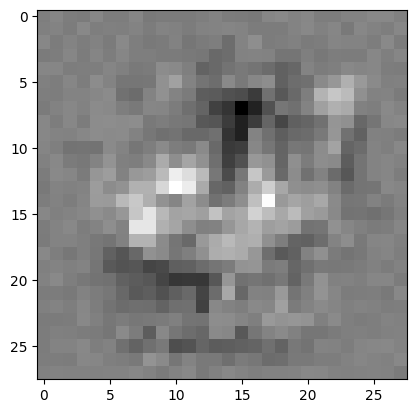

Época 100/100, Perda: 0.100981, Acurácia: 0.9930


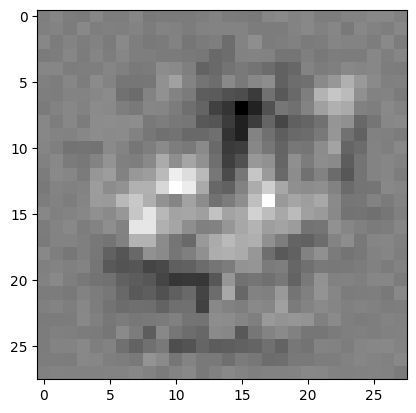

In [30]:
# Exercício 1 e 2

epochs = 100
a = 5
losses = []
zs = []
fig = plt.figure(figsize=(18, 6))

try:
    for i in range(epochs):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # Predict da rede
        outputs = model(inputs)
        zs.append(outputs[1].detach().numpy())

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() # Atualiza os pesos

        # Adicionar perda à lista de perdas
        losses.append(loss.data)

        _, predicts = torch.max(outputs, 1)
        y_pred = predicts.data
        accuracy = (y_pred.numpy() == y_train.numpy()).mean()

        # Imprimir os resultados da época
        print(f"Época {i + 1}/{epochs}, Perda: {loss.item():.6f}, Acurácia: {accuracy:.4f}")

        # Visualizando pesos da classe 4
        plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray') # O reshape restaura as imagens, que tinham sido transformadas em um array, para uma matriz novamente
        plt.show()

except KeyboardInterrupt:
    pass

<Figure size 1800x600 with 0 Axes>

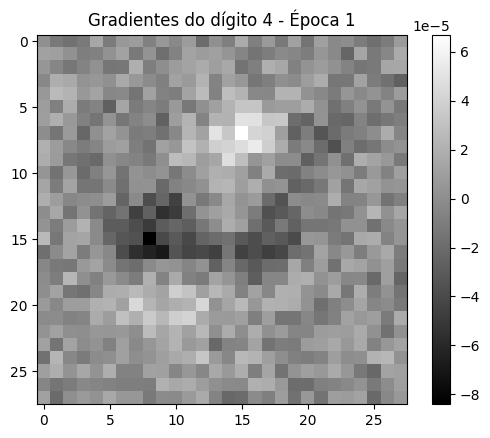

Época 1/100 - Perda: 0.9060, Acurácia: 0.8320


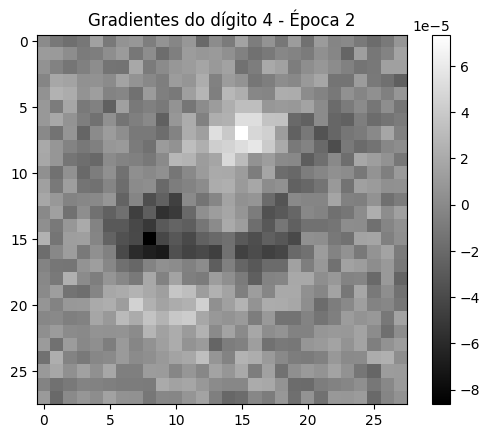

Época 2/100 - Perda: 0.8438, Acurácia: 0.8330


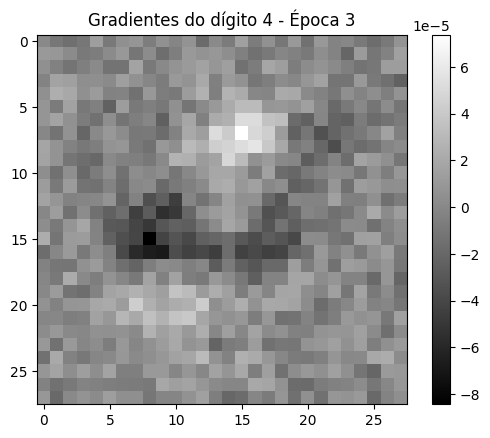

Época 3/100 - Perda: 0.7938, Acurácia: 0.8430


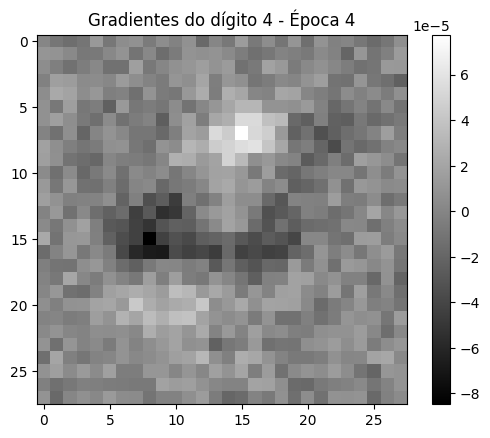

Época 4/100 - Perda: 0.7527, Acurácia: 0.8430


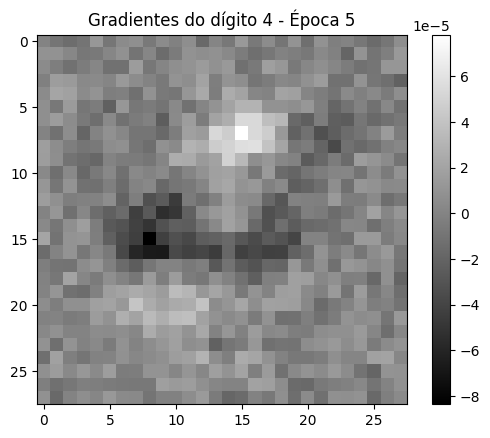

Época 5/100 - Perda: 0.7181, Acurácia: 0.8510


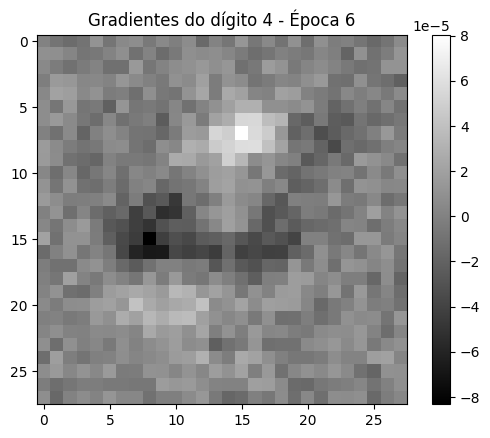

Época 6/100 - Perda: 0.6884, Acurácia: 0.8590


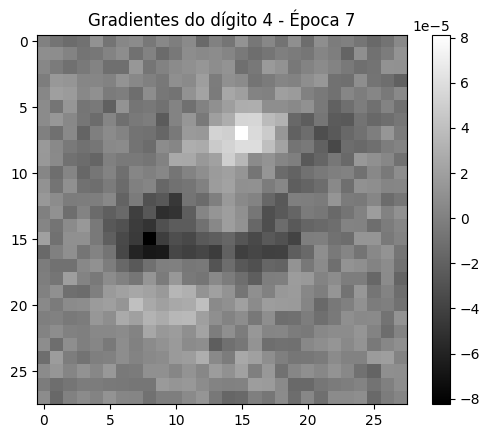

Época 7/100 - Perda: 0.6626, Acurácia: 0.8620


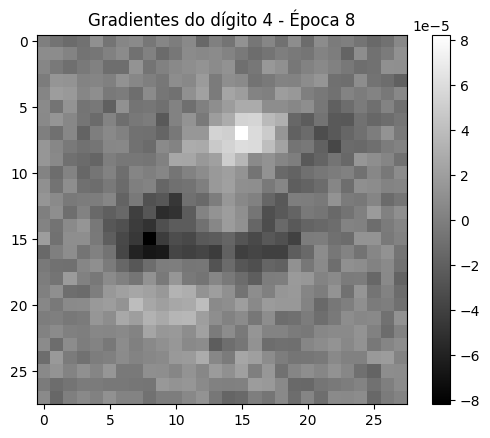

Época 8/100 - Perda: 0.6398, Acurácia: 0.8650


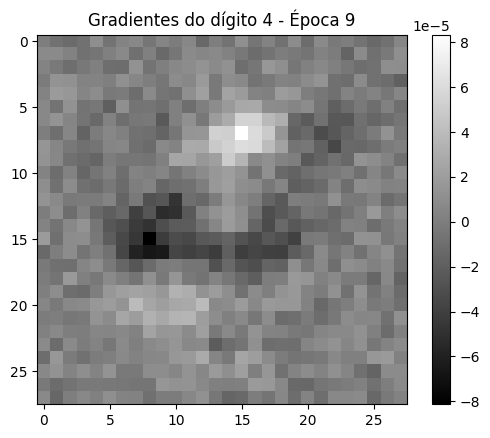

Época 9/100 - Perda: 0.6196, Acurácia: 0.8710


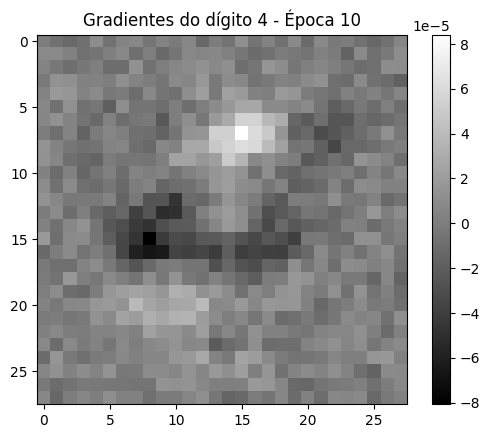

Época 10/100 - Perda: 0.6015, Acurácia: 0.8760


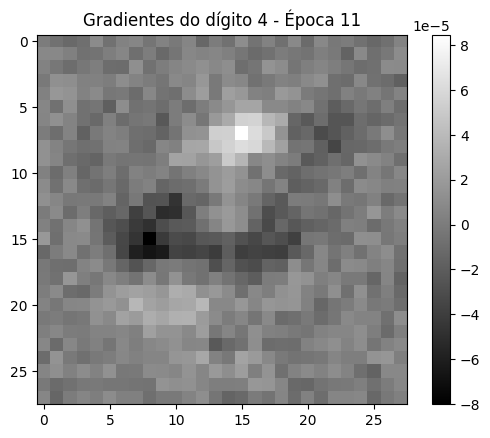

Época 11/100 - Perda: 0.5851, Acurácia: 0.8790


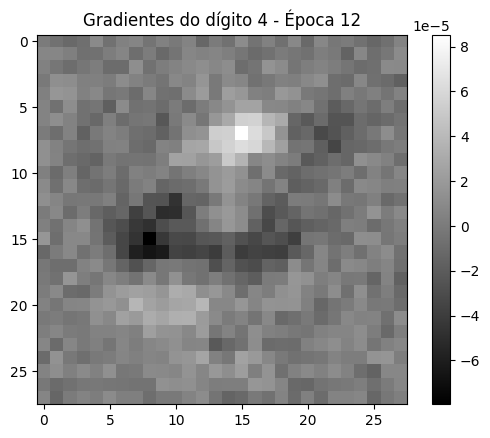

Época 12/100 - Perda: 0.5702, Acurácia: 0.8800


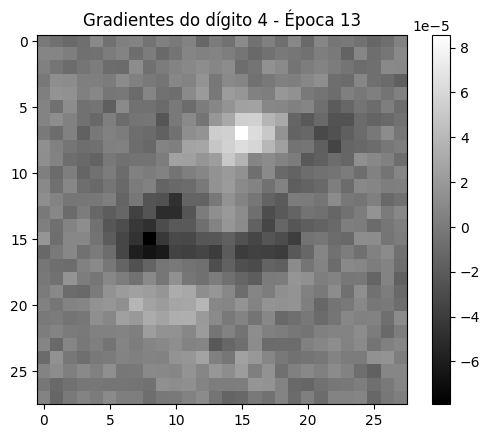

Época 13/100 - Perda: 0.5566, Acurácia: 0.8820


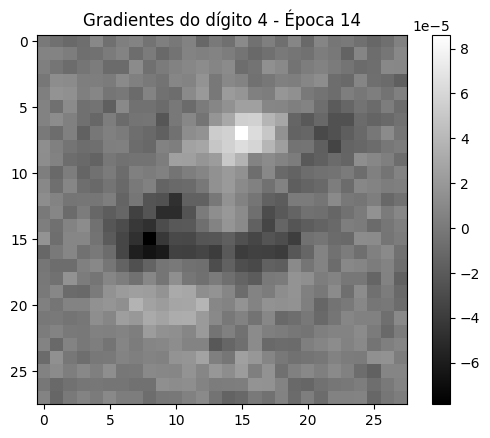

Época 14/100 - Perda: 0.5440, Acurácia: 0.8830


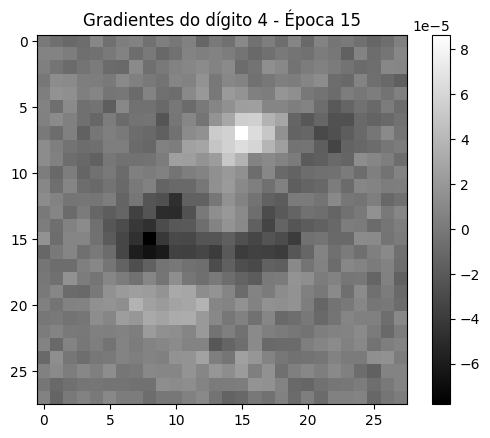

Época 15/100 - Perda: 0.5324, Acurácia: 0.8870


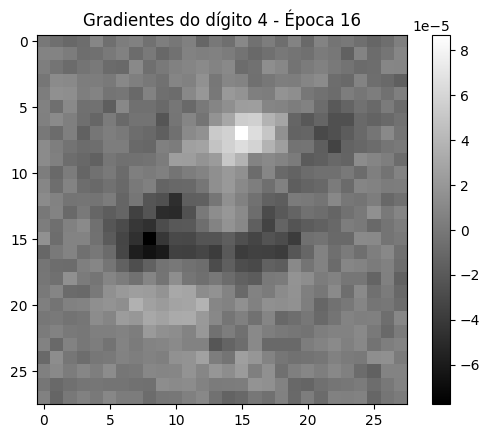

Época 16/100 - Perda: 0.5216, Acurácia: 0.8880


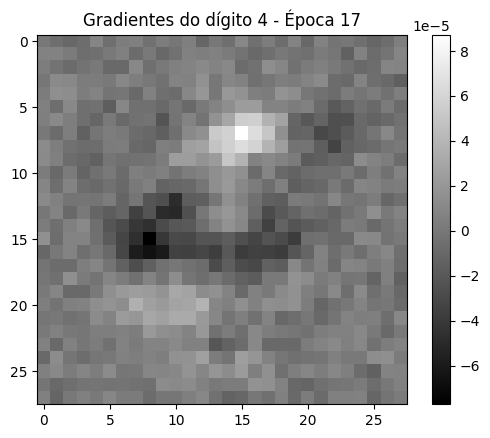

Época 17/100 - Perda: 0.5115, Acurácia: 0.8900


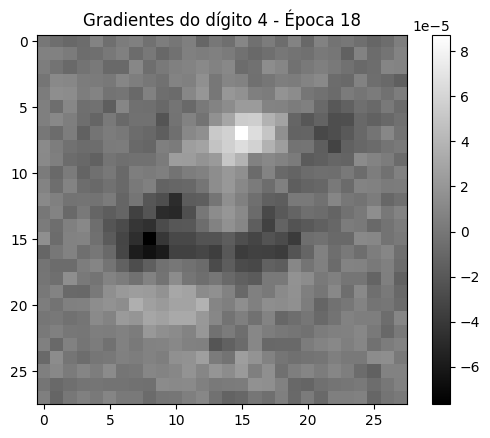

Época 18/100 - Perda: 0.5021, Acurácia: 0.8920


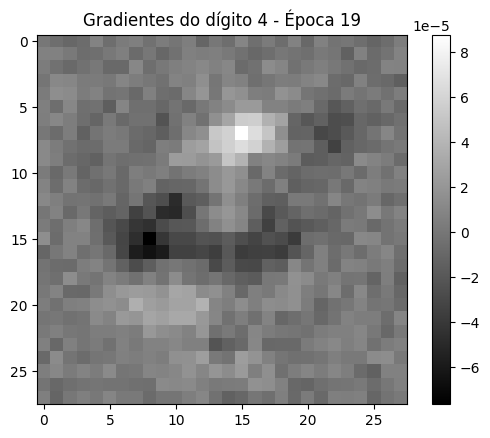

Época 19/100 - Perda: 0.4932, Acurácia: 0.8950


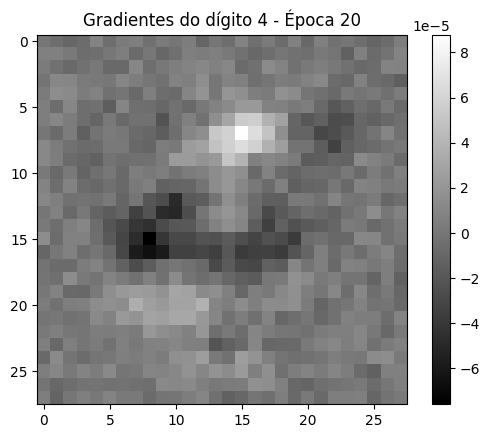

Época 20/100 - Perda: 0.4849, Acurácia: 0.8960


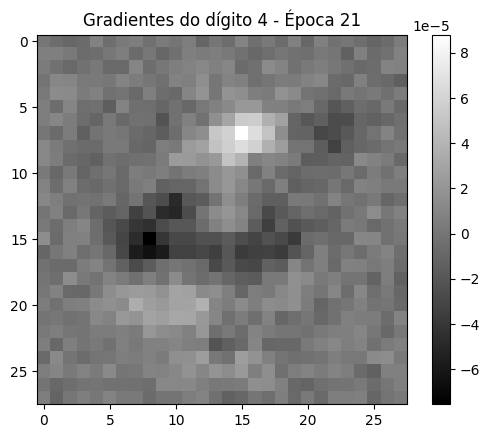

Época 21/100 - Perda: 0.4770, Acurácia: 0.8970


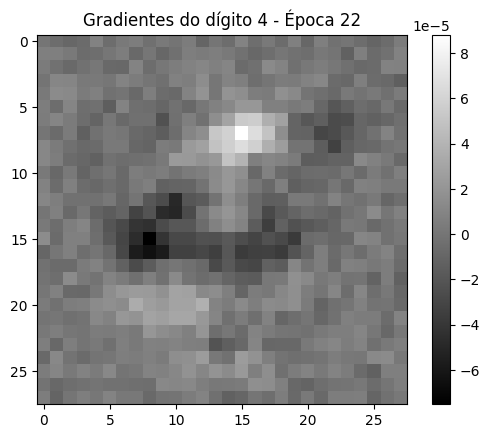

Época 22/100 - Perda: 0.4696, Acurácia: 0.9000


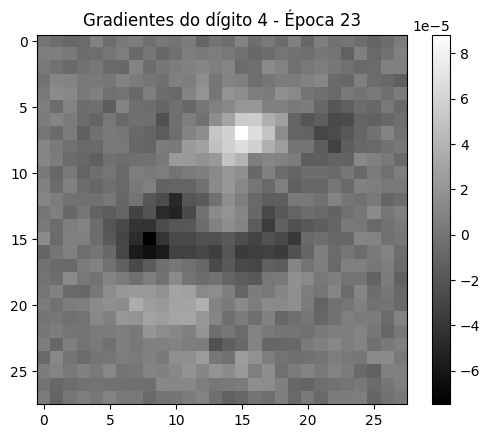

Época 23/100 - Perda: 0.4625, Acurácia: 0.9000


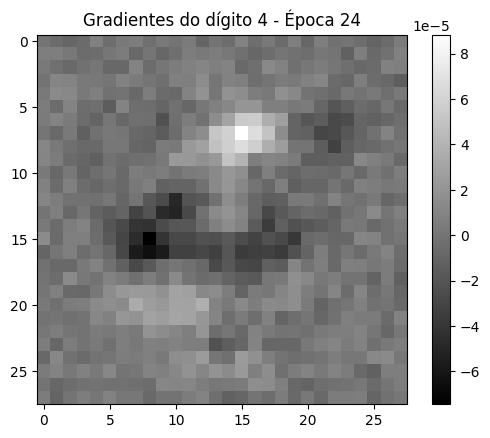

Época 24/100 - Perda: 0.4558, Acurácia: 0.9010


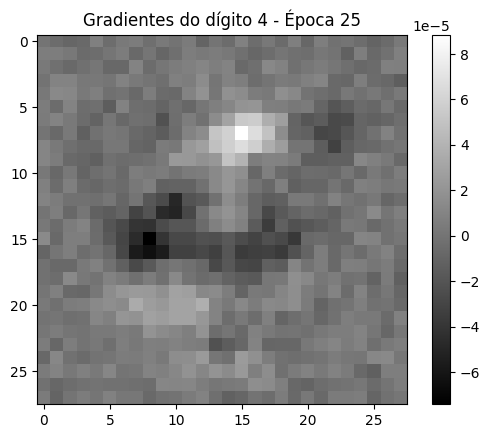

Época 25/100 - Perda: 0.4494, Acurácia: 0.9030


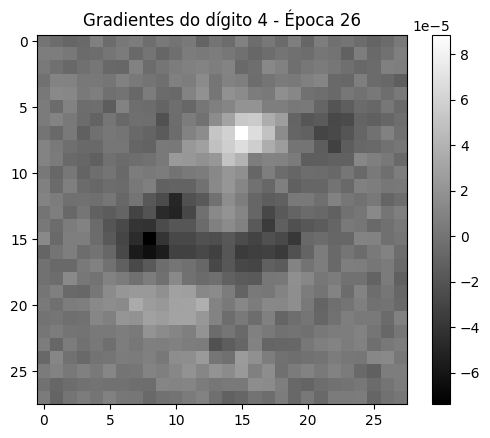

Época 26/100 - Perda: 0.4433, Acurácia: 0.9030


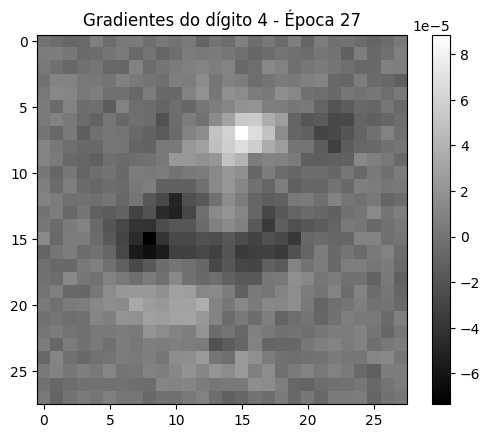

Época 27/100 - Perda: 0.4375, Acurácia: 0.9030


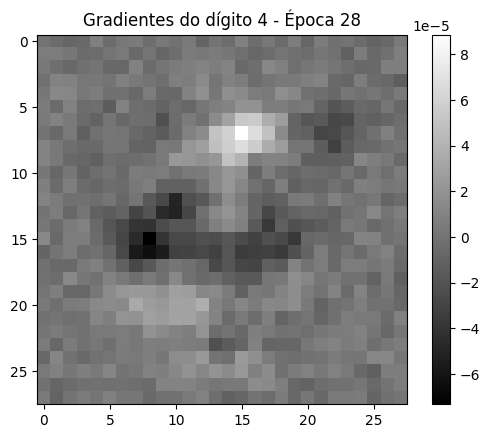

Época 28/100 - Perda: 0.4319, Acurácia: 0.9060


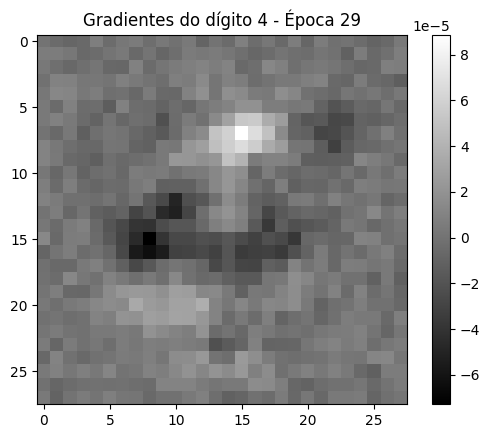

Época 29/100 - Perda: 0.4266, Acurácia: 0.9070


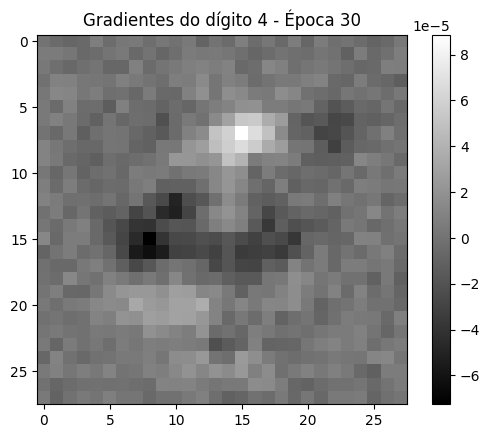

Época 30/100 - Perda: 0.4214, Acurácia: 0.9080


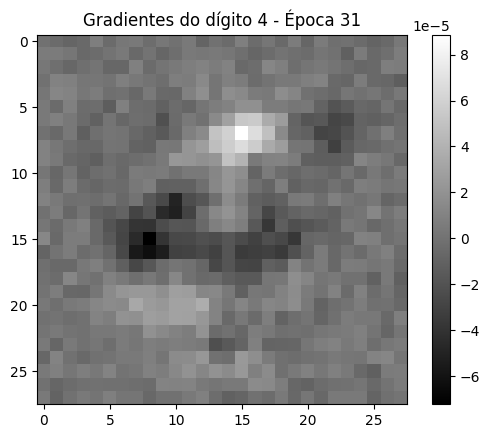

Época 31/100 - Perda: 0.4165, Acurácia: 0.9090


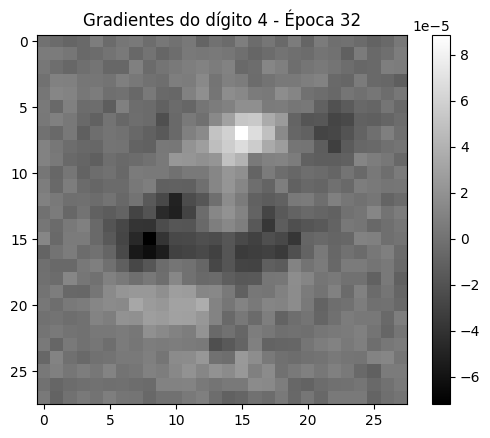

Época 32/100 - Perda: 0.4118, Acurácia: 0.9090


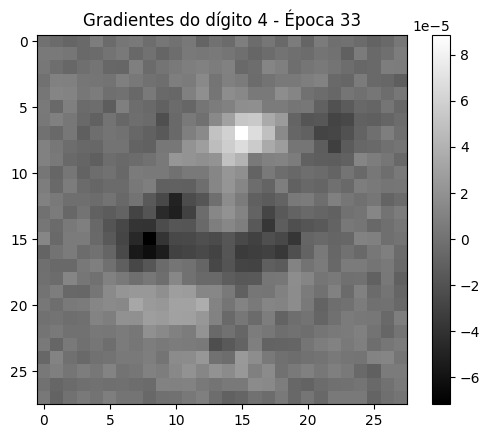

Época 33/100 - Perda: 0.4072, Acurácia: 0.9110


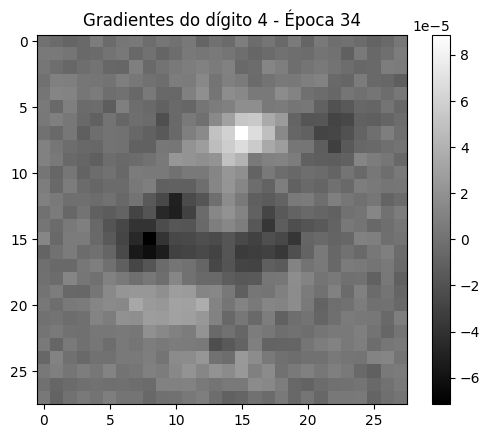

Época 34/100 - Perda: 0.4028, Acurácia: 0.9110


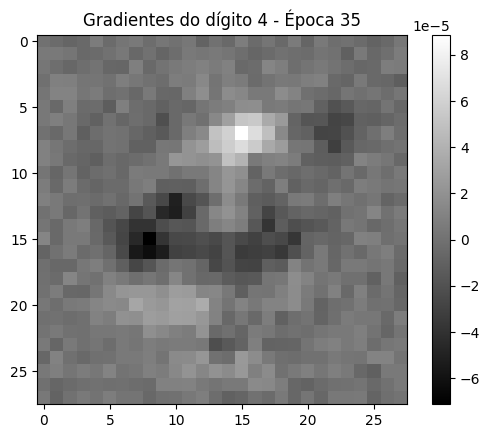

Época 35/100 - Perda: 0.3985, Acurácia: 0.9130


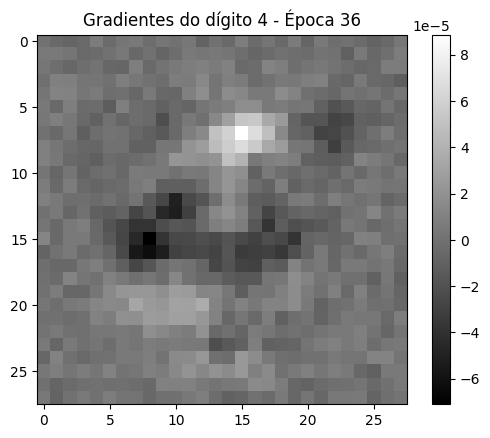

Época 36/100 - Perda: 0.3944, Acurácia: 0.9140


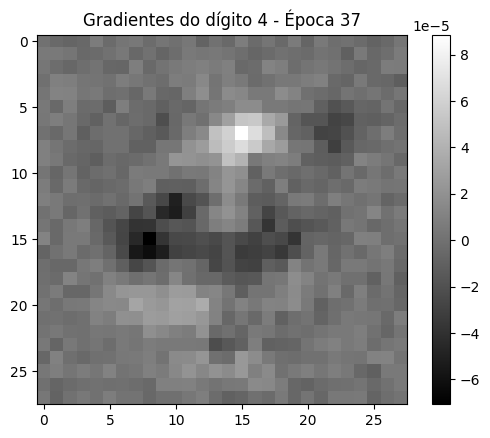

Época 37/100 - Perda: 0.3904, Acurácia: 0.9160


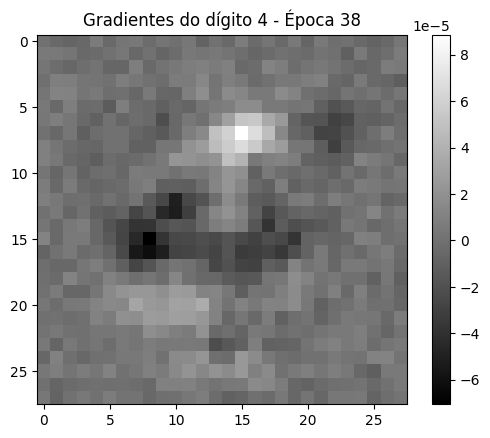

Época 38/100 - Perda: 0.3865, Acurácia: 0.9190


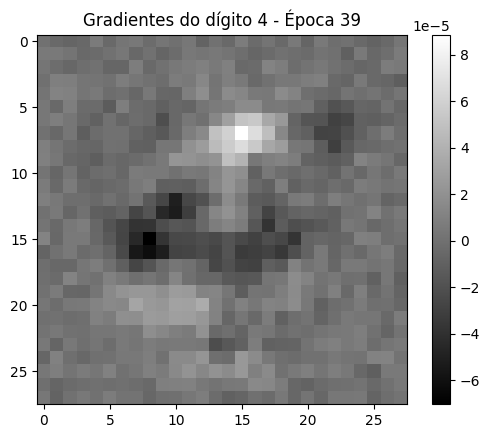

Época 39/100 - Perda: 0.3827, Acurácia: 0.9190


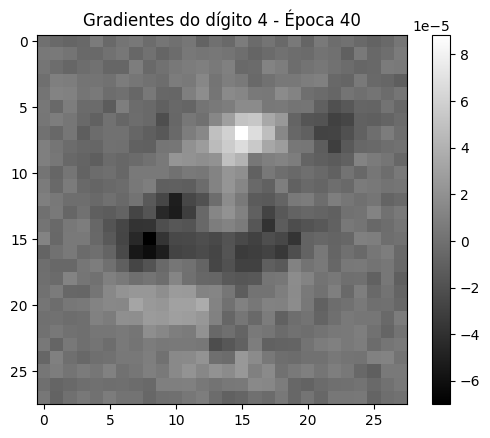

Época 40/100 - Perda: 0.3791, Acurácia: 0.9190


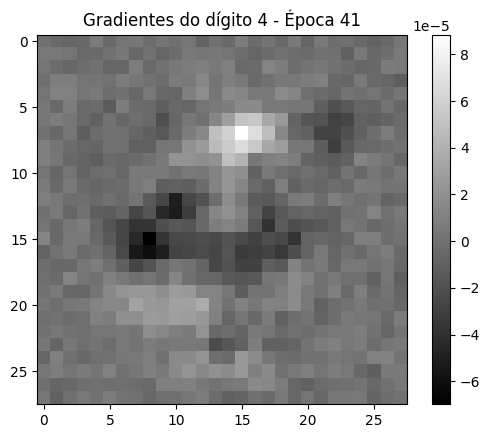

Época 41/100 - Perda: 0.3756, Acurácia: 0.9190


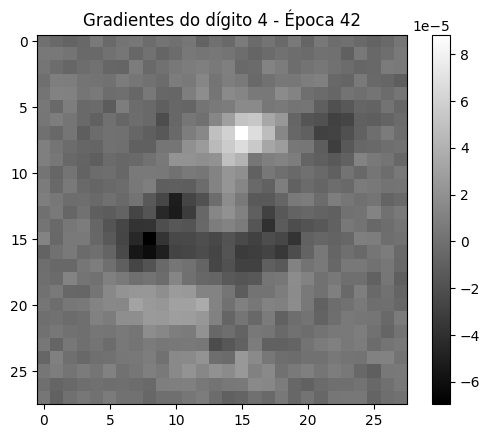

Época 42/100 - Perda: 0.3721, Acurácia: 0.9190


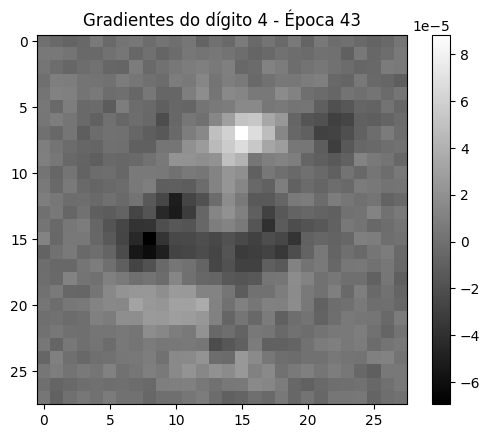

Época 43/100 - Perda: 0.3688, Acurácia: 0.9200


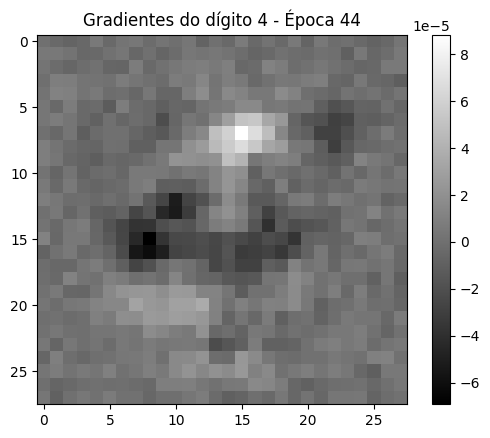

Época 44/100 - Perda: 0.3656, Acurácia: 0.9210


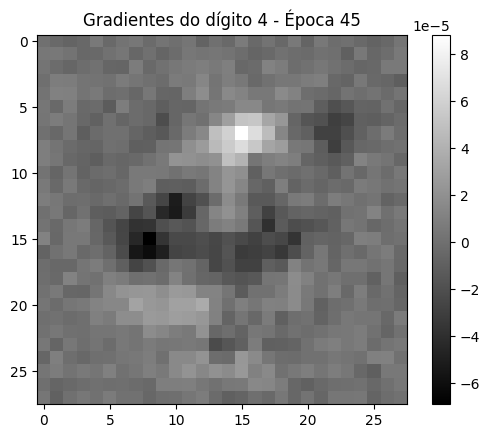

Época 45/100 - Perda: 0.3624, Acurácia: 0.9220


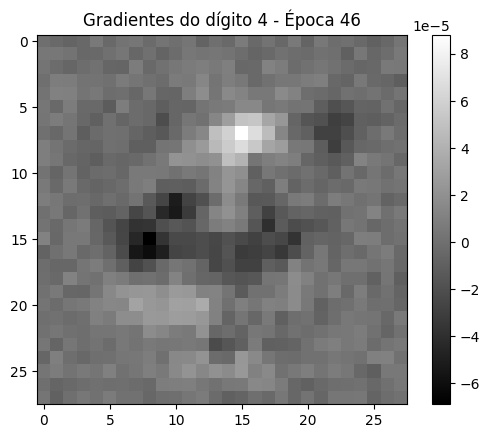

Época 46/100 - Perda: 0.3593, Acurácia: 0.9240


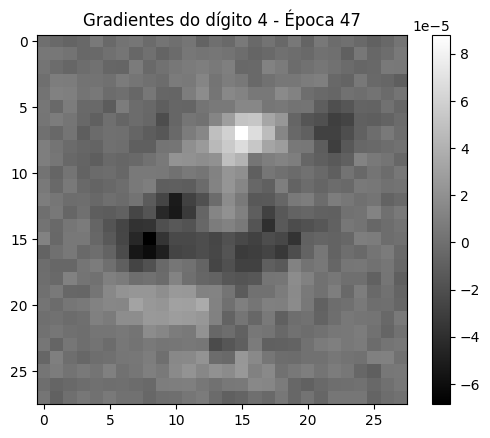

Época 47/100 - Perda: 0.3563, Acurácia: 0.9240


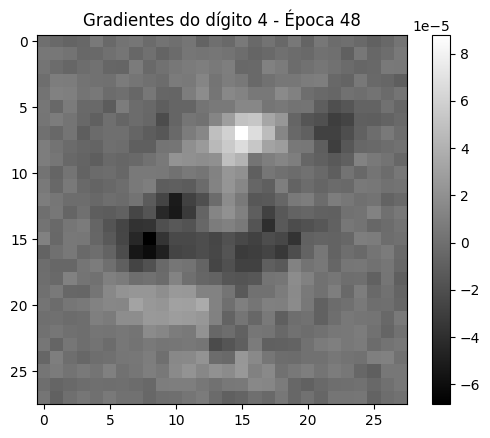

Época 48/100 - Perda: 0.3534, Acurácia: 0.9240


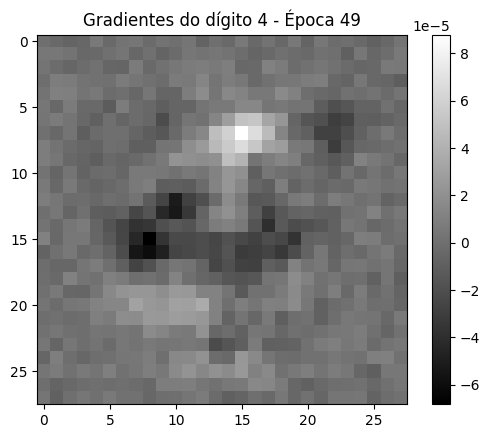

Época 49/100 - Perda: 0.3505, Acurácia: 0.9240


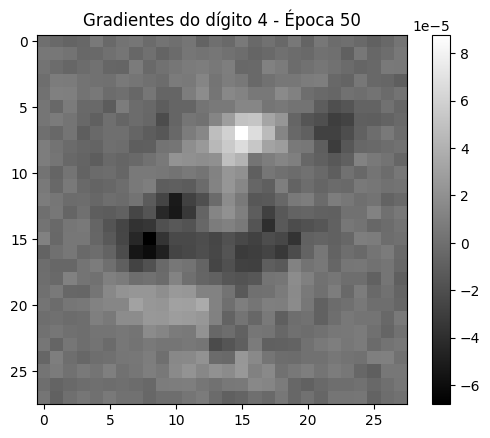

Época 50/100 - Perda: 0.3477, Acurácia: 0.9240


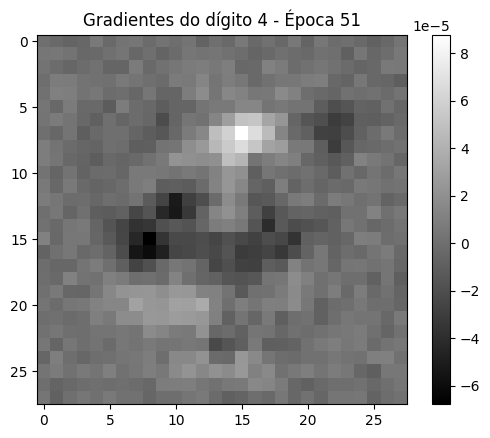

Época 51/100 - Perda: 0.3450, Acurácia: 0.9240


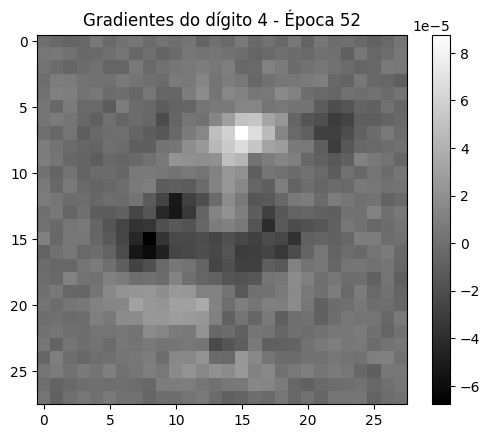

Época 52/100 - Perda: 0.3423, Acurácia: 0.9240


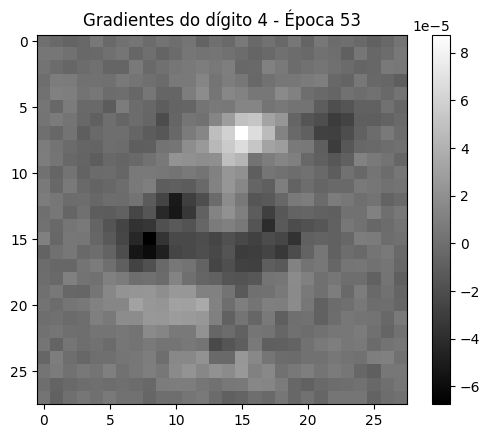

Época 53/100 - Perda: 0.3397, Acurácia: 0.9250


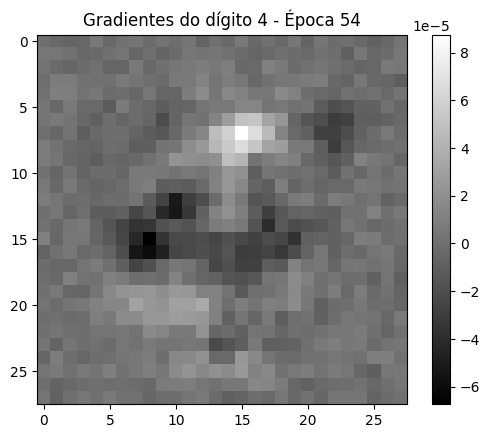

Época 54/100 - Perda: 0.3372, Acurácia: 0.9250


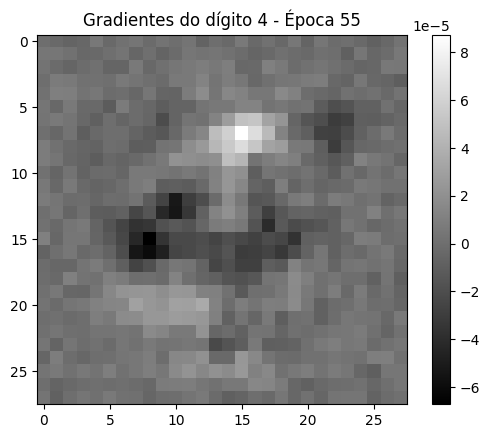

Época 55/100 - Perda: 0.3347, Acurácia: 0.9250


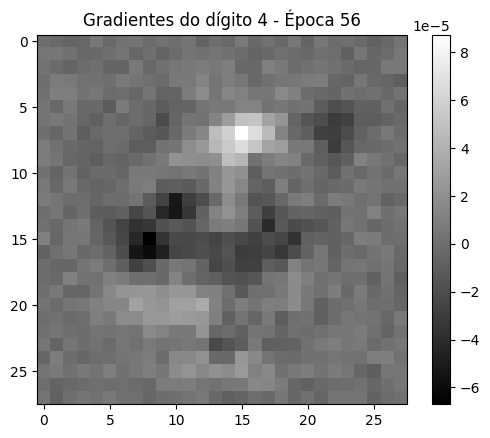

Época 56/100 - Perda: 0.3322, Acurácia: 0.9250


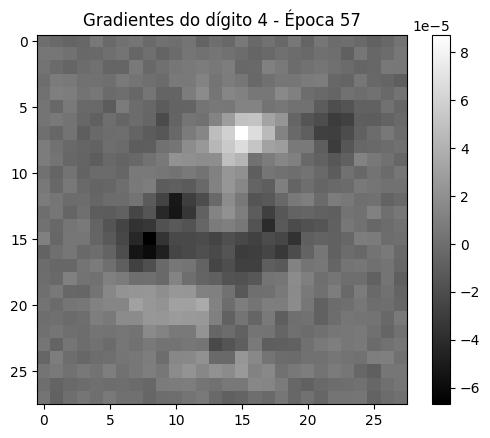

Época 57/100 - Perda: 0.3298, Acurácia: 0.9260


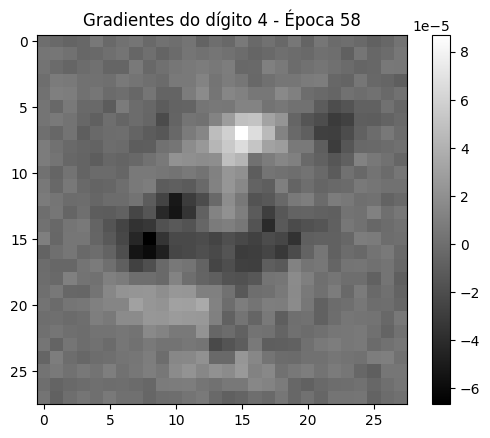

Época 58/100 - Perda: 0.3275, Acurácia: 0.9260


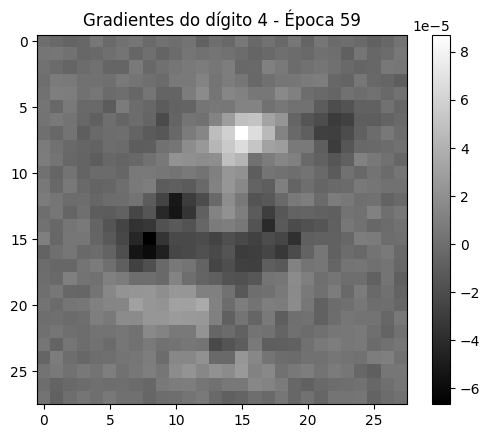

Época 59/100 - Perda: 0.3252, Acurácia: 0.9260


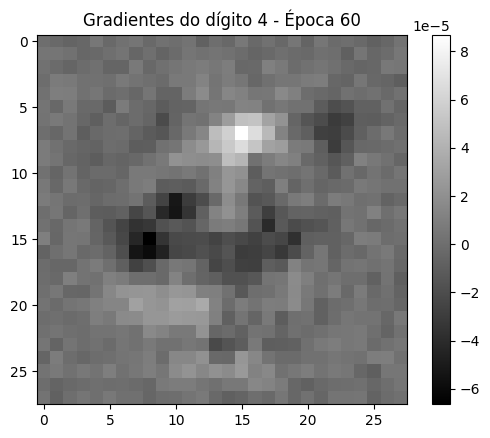

Época 60/100 - Perda: 0.3229, Acurácia: 0.9260


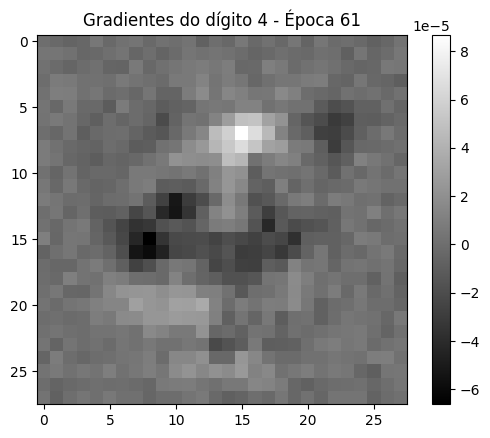

Época 61/100 - Perda: 0.3207, Acurácia: 0.9260


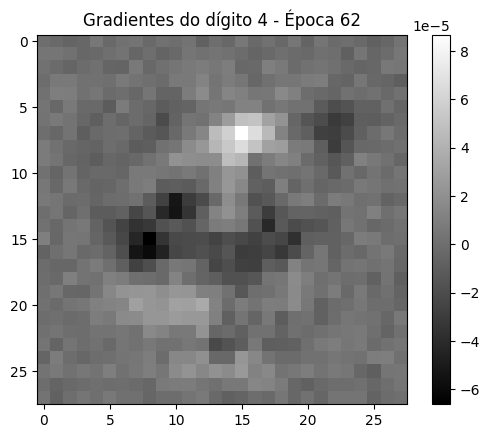

Época 62/100 - Perda: 0.3186, Acurácia: 0.9270


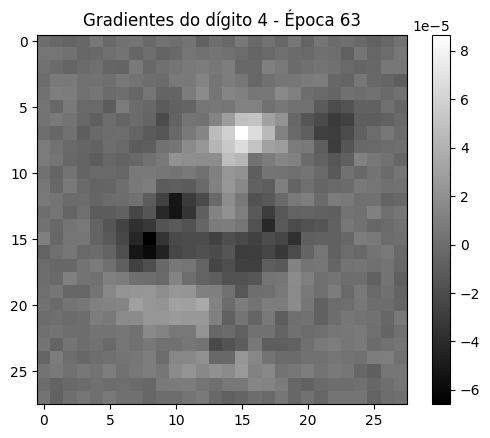

Época 63/100 - Perda: 0.3164, Acurácia: 0.9270


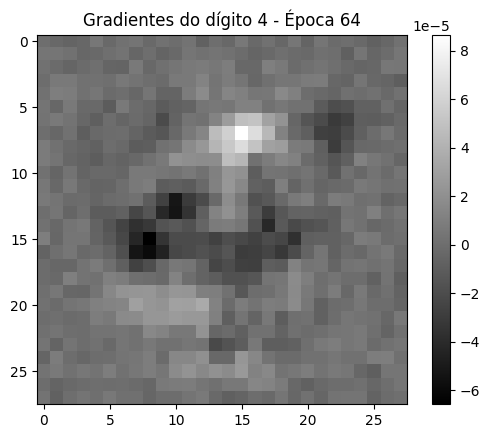

Época 64/100 - Perda: 0.3143, Acurácia: 0.9270


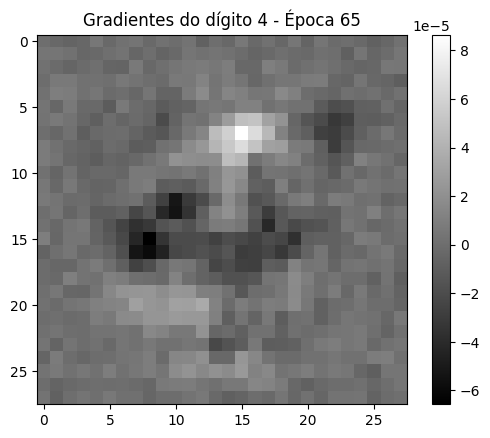

Época 65/100 - Perda: 0.3123, Acurácia: 0.9270


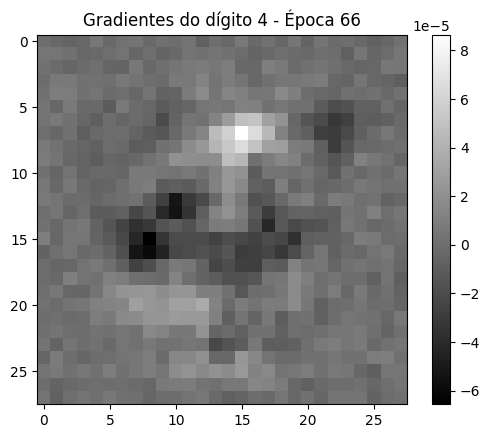

Época 66/100 - Perda: 0.3103, Acurácia: 0.9270


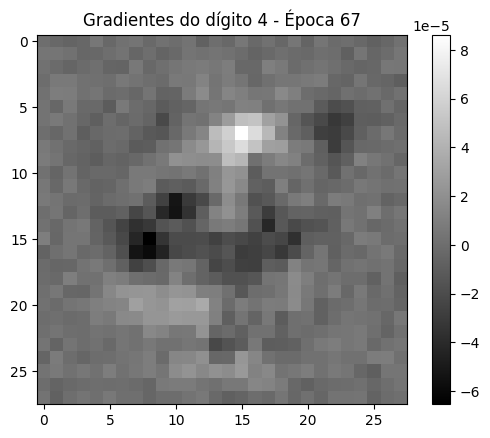

Época 67/100 - Perda: 0.3083, Acurácia: 0.9270


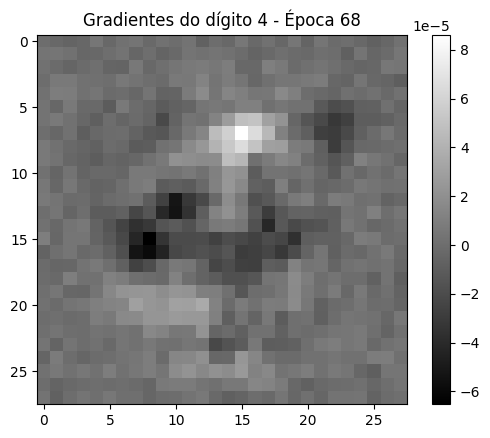

Época 68/100 - Perda: 0.3063, Acurácia: 0.9270


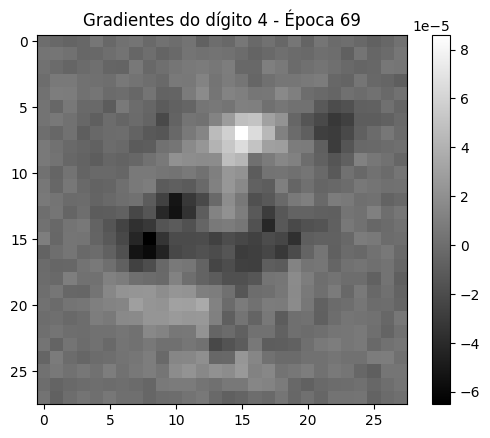

Época 69/100 - Perda: 0.3044, Acurácia: 0.9270


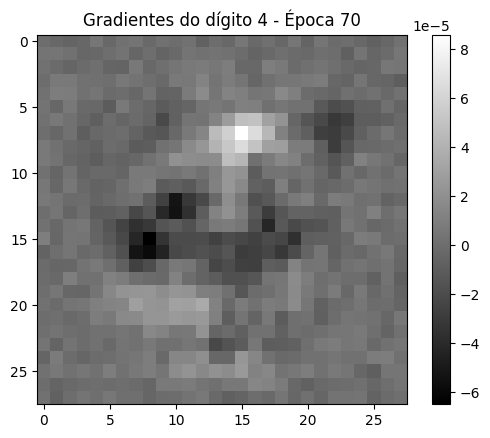

Época 70/100 - Perda: 0.3025, Acurácia: 0.9270


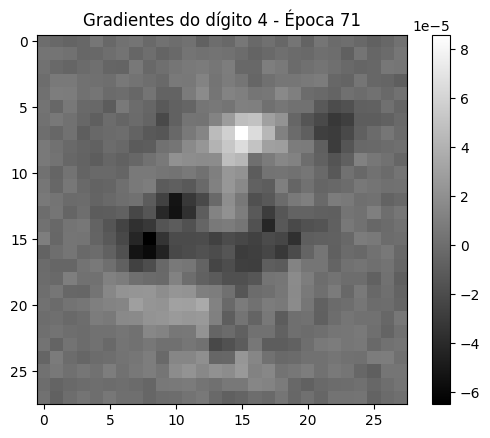

Época 71/100 - Perda: 0.3007, Acurácia: 0.9280


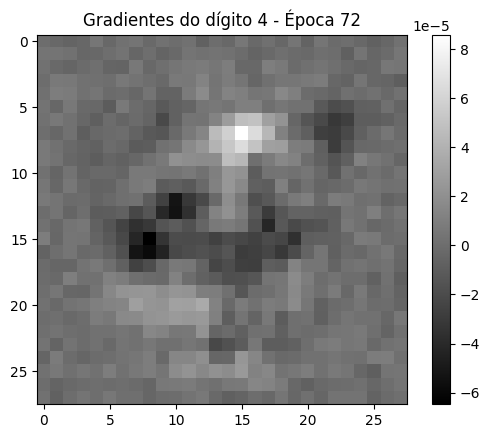

Época 72/100 - Perda: 0.2989, Acurácia: 0.9300


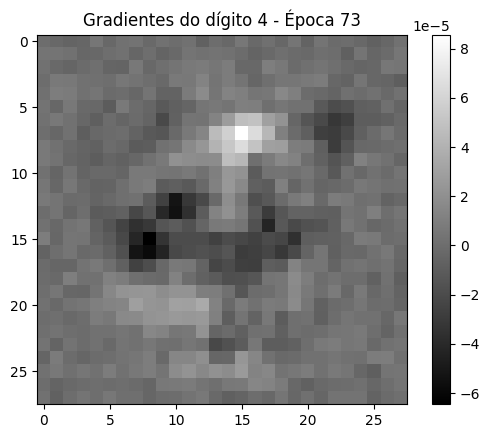

Época 73/100 - Perda: 0.2971, Acurácia: 0.9300


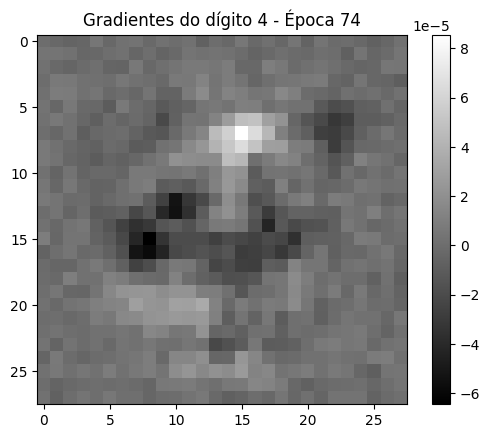

Época 74/100 - Perda: 0.2953, Acurácia: 0.9310


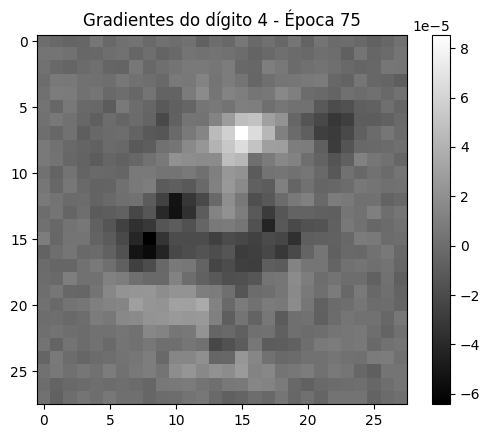

Época 75/100 - Perda: 0.2936, Acurácia: 0.9320


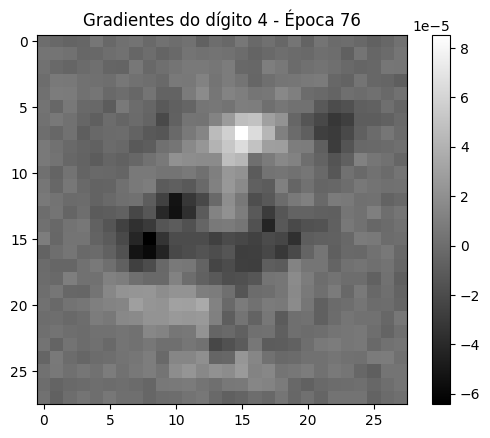

Época 76/100 - Perda: 0.2918, Acurácia: 0.9320


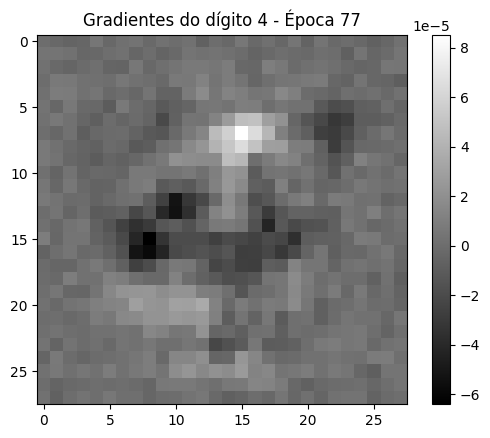

Época 77/100 - Perda: 0.2902, Acurácia: 0.9320


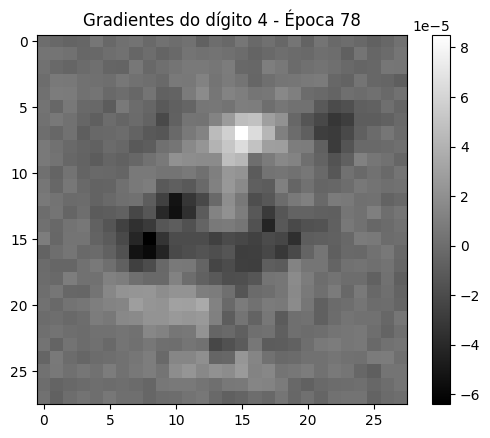

Época 78/100 - Perda: 0.2885, Acurácia: 0.9330


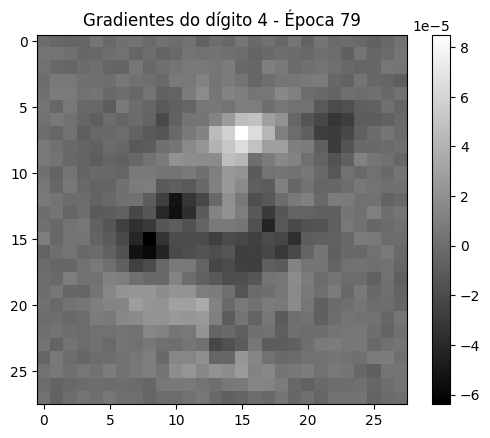

Época 79/100 - Perda: 0.2869, Acurácia: 0.9330


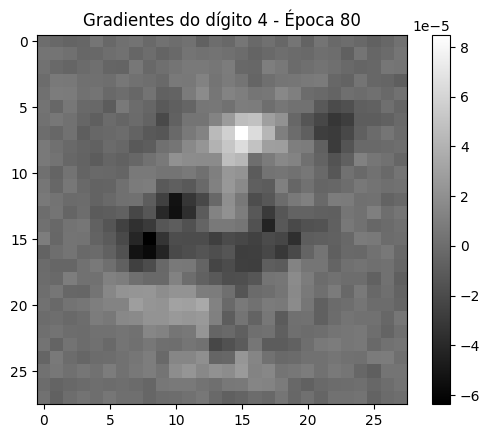

Época 80/100 - Perda: 0.2852, Acurácia: 0.9340


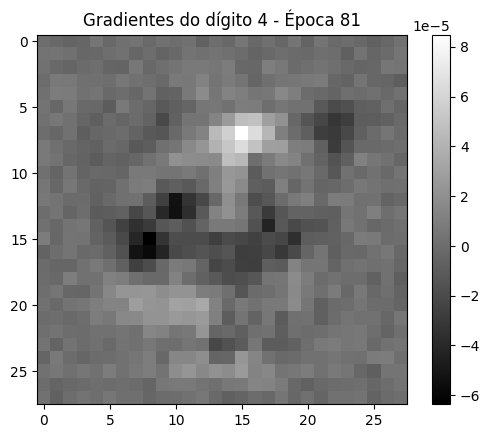

Época 81/100 - Perda: 0.2836, Acurácia: 0.9350


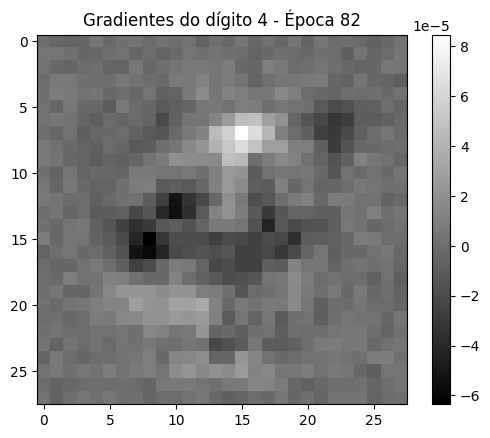

Época 82/100 - Perda: 0.2821, Acurácia: 0.9350


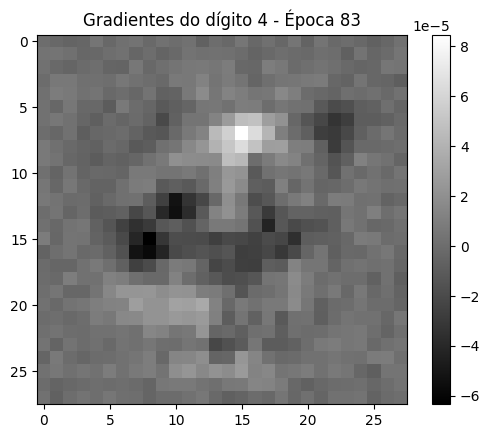

Época 83/100 - Perda: 0.2805, Acurácia: 0.9370


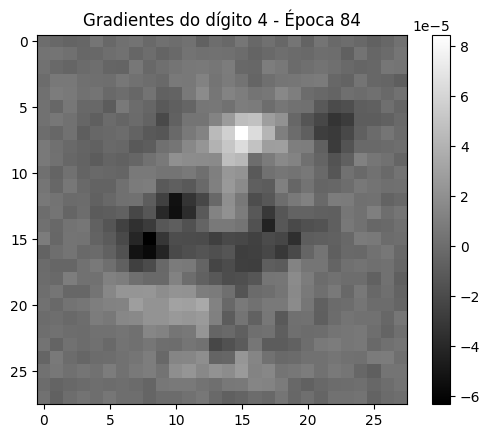

Época 84/100 - Perda: 0.2790, Acurácia: 0.9380


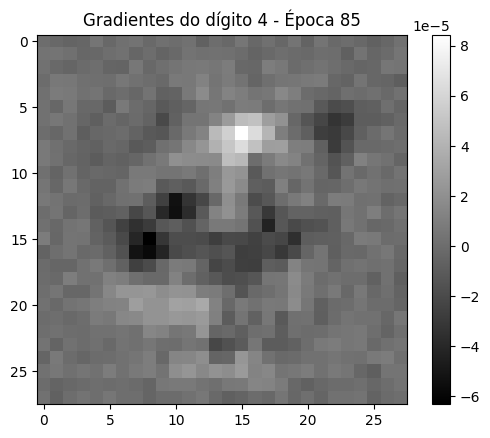

Época 85/100 - Perda: 0.2775, Acurácia: 0.9380


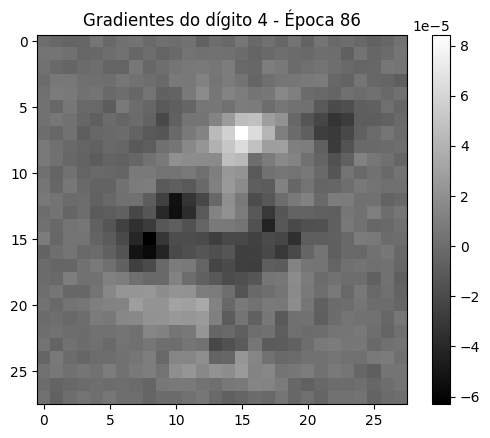

Época 86/100 - Perda: 0.2760, Acurácia: 0.9390


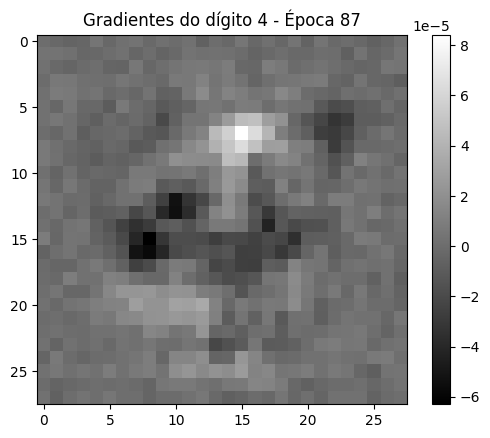

Época 87/100 - Perda: 0.2745, Acurácia: 0.9390


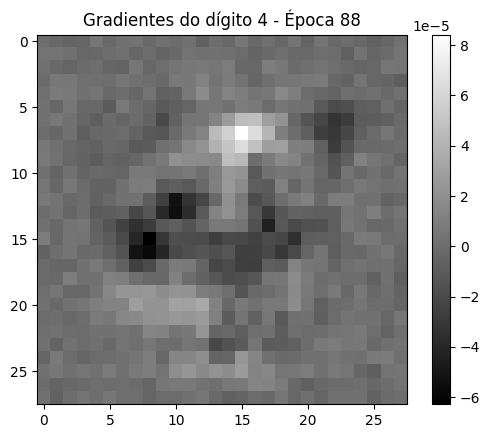

Época 88/100 - Perda: 0.2731, Acurácia: 0.9390


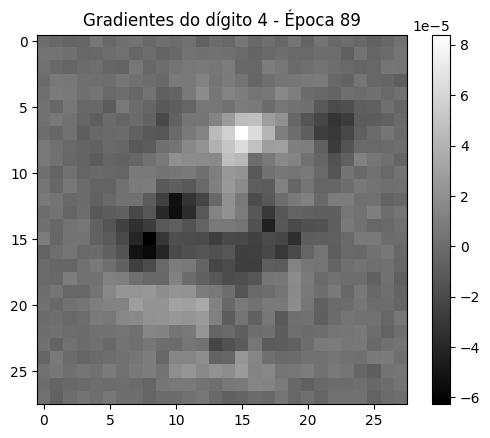

Época 89/100 - Perda: 0.2717, Acurácia: 0.9390


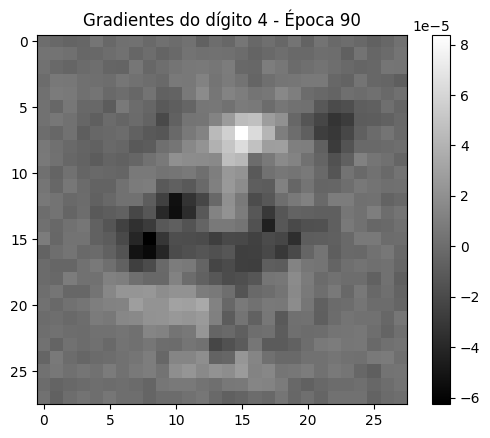

Época 90/100 - Perda: 0.2702, Acurácia: 0.9390


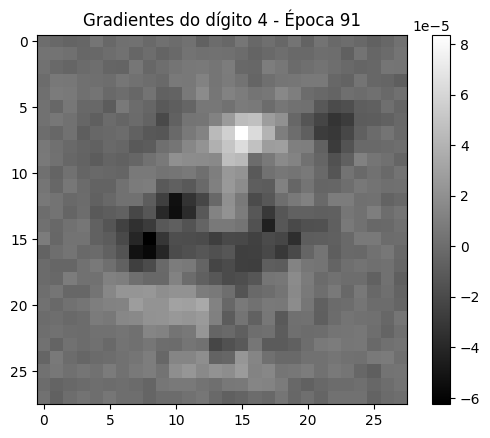

Época 91/100 - Perda: 0.2688, Acurácia: 0.9390


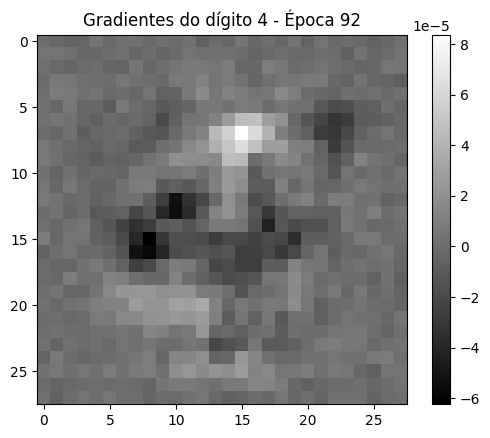

Época 92/100 - Perda: 0.2675, Acurácia: 0.9390


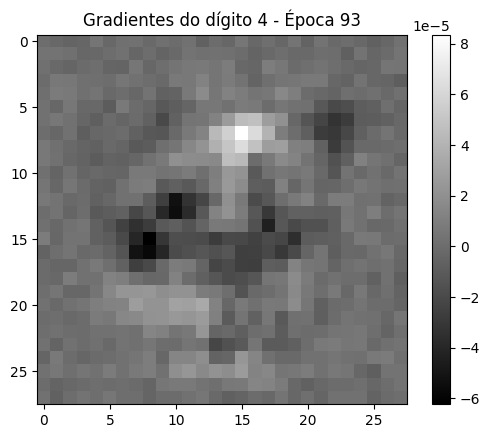

Época 93/100 - Perda: 0.2661, Acurácia: 0.9410


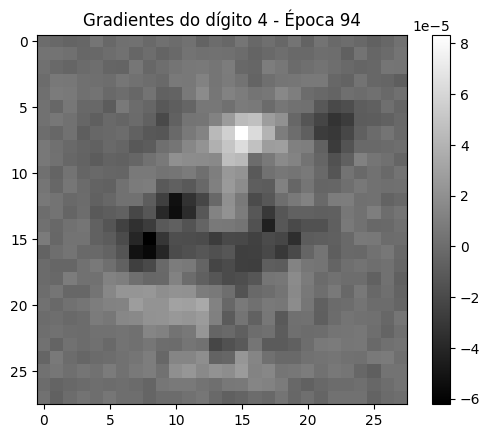

Época 94/100 - Perda: 0.2648, Acurácia: 0.9410


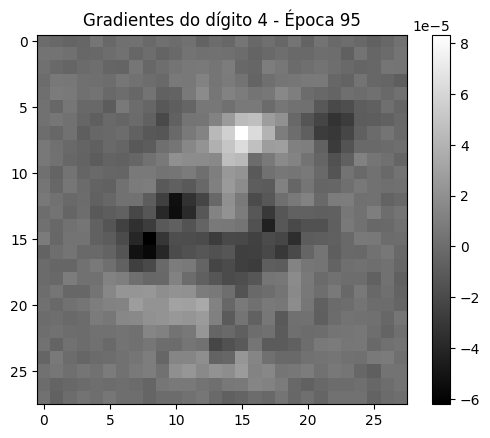

Época 95/100 - Perda: 0.2634, Acurácia: 0.9410


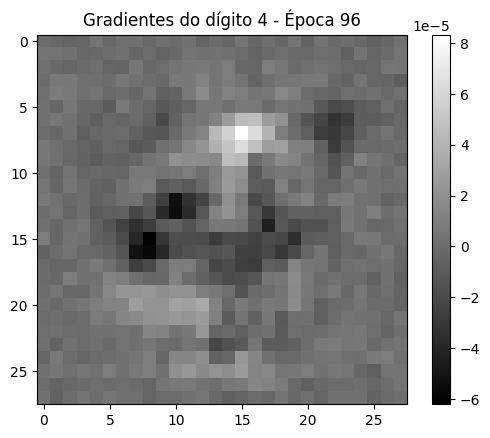

Época 96/100 - Perda: 0.2621, Acurácia: 0.9420


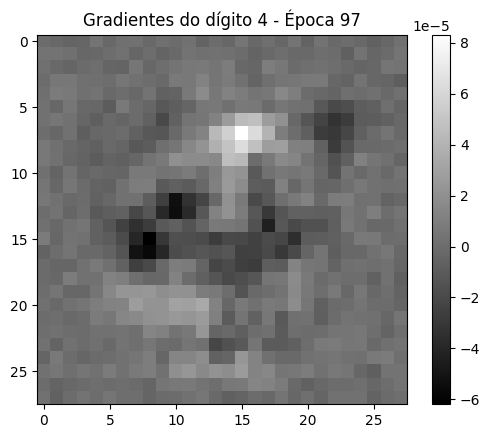

Época 97/100 - Perda: 0.2608, Acurácia: 0.9420


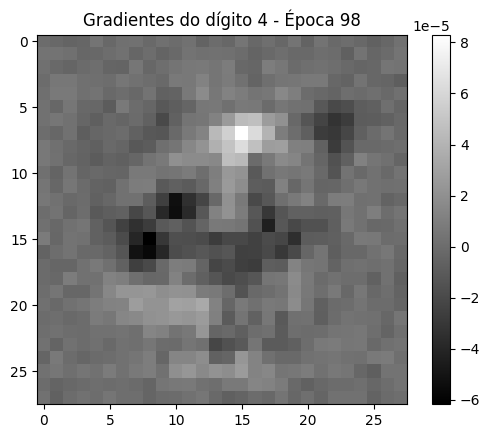

Época 98/100 - Perda: 0.2595, Acurácia: 0.9430


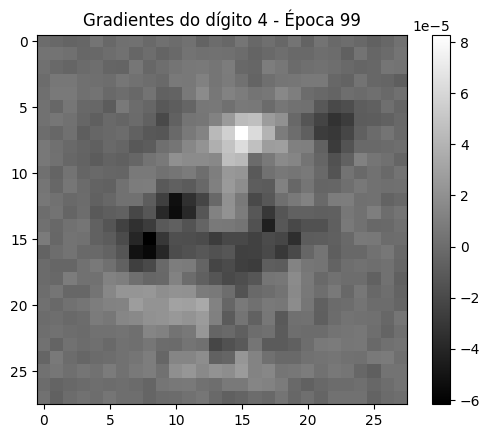

Época 99/100 - Perda: 0.2583, Acurácia: 0.9430


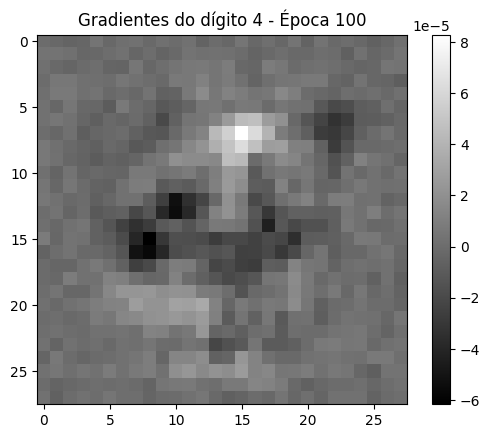

Época 100/100 - Perda: 0.2570, Acurácia: 0.9430


In [51]:
# Exercício 1 e 2

epochs = 100
losses = []
zs = []

fig = plt.figure(figsize=(18, 6))

try:
    for epoch in range(epochs):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28), requires_grad=True)
        # Predict da rede
        outputs = model(inputs)
        zs.append(outputs[1].detach().numpy())

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()  # Calcula os gradients
        optimizer.step() # Atualiza os pesos

        losses.append(loss.data) # Adicionar perda à lista de perdas

        _, predicts = torch.max(outputs, 1)

        y_pred = predicts.data
        accuracy = (y_pred.numpy() == y_train.numpy()).mean()

        # Extrair gradientes das entradas para o dígito 4
        gradientes_digito_4 = inputs.grad[y_train == 4].mean(dim=0).detach().numpy().reshape(28, 28)

        # Visualizar gradientes do dígito 4
        plt.figure()
        plt.title(f"Gradientes do dígito 4 - Época {epoch + 1}")
        plt.imshow(gradientes_digito_4, cmap="gray")
        plt.colorbar()
        plt.show()

        # Exibir informações da época
        print(f"Época {epoch + 1}/{epochs} - Perda: {loss.item():.4f}, Acurácia: {accuracy:.4f}")  # Corrected loop variable

except KeyboardInterrupt:
    pass

<details>
<summary>Mostrar Resultado</summary>

```python
from IPython import display
import numpy
a = 5
losses = []
zs = []
fig = plt.figure(figsize=(18, 6))

try:
    for i in range(epochs):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # Predict da rede
        outputs = model(inputs)
        zs.append(outputs[1].detach().numpy())

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.data)
        weights_d = model.weight.data[4].numpy().reshape(28,28)
        weights_g = model.weight.grad.data[4].numpy().reshape(28,28)
        ww = np.concatenate((weights_d,weights_g),1)
        plt.imshow(ww.reshape((28,28*2)),cmap = 'gray')
        display.display(fig)
        display.clear_output(wait=True)
        input(i)
        
        _, predicts = torch.max(outputs, 1)

        y_pred = predicts.data
        accuracy = (y_pred.numpy() == y_train.numpy()).mean()
        print('Accuracy:', accuracy)
        print("epoca: " + str(i + 1))
        print("perda: " + str(loss.data.detach().numpy()))
except KeyboardInterrupt:
    pass
```

</details>



## Perguntas

1. Qual é o shape da matriz de entrada na rede? **R - A matriz é originalmente 28x28, mas para entrar os dados no modelo ele tem que ser transformado em uma matriz/array linear, ou seja, os dados são achatados. Shape da entrada na rede: [n, 784]**

2. Qual é o shape da saída da rede? **R - A saída também sai com um array linear, porém devemos usar o reshape() para transformar em uma matriz 28x28. Os pesos da rede possuem shape [10, 784] e podem ser visualizados como imagens 28x28 (um peso por neurônio de saída). **

3. Qual é o número total de parâmetros da rede, incluindo o bias? **R Pesos: A camada linear tem 10 neurônios de saída, cada um conectado a
784 pixels de entrada:
Pesos = 10 x 784 = 7,840
Há um valor de bias para cada neurônio de saída:
Bias = 10**

# Aprendizados
